## **Import Library**

In [1]:
import os
import random
import shutil
import hashlib
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve, roc_curve, auc, precision_score, recall_score, roc_auc_score
from PIL import Image


# **Data Preprocessing and Data Split**

The provided dataset contains two files, 'gender' and 'gender_rev2'. The image data in both files are data segmented by the author. The authors split it into three files 'test', 'train', and 'valid'. Each file contains two categories, 'male' and 'female'. There were a total of 3891 files. To make the data more adaptable with the task in this study. First I contained an 'Image_Datasets' file, which created an 'original_dataset' file. 'original_dataset' file contains two empty files for 'male' and 'female'. Then I took the author's 3891 image files and put them into the male and female files. Also I used the author's 'image to predict' file to test the actual recognition ability of the model. After that start this experiment.
Datasets URL:https://www.kaggle.com/datasets/gpiosenka/gender-classification-from-an-image 

    Data Checking and Cleaning 

Found 3891 images belonging to 2 classes.
Class labels:
 - female: 0
 - male: 1
Number of samples per class: {'female': 1947, 'male': 1944}
Most common resolution: [ 84 109]
No issues found in the dataset.


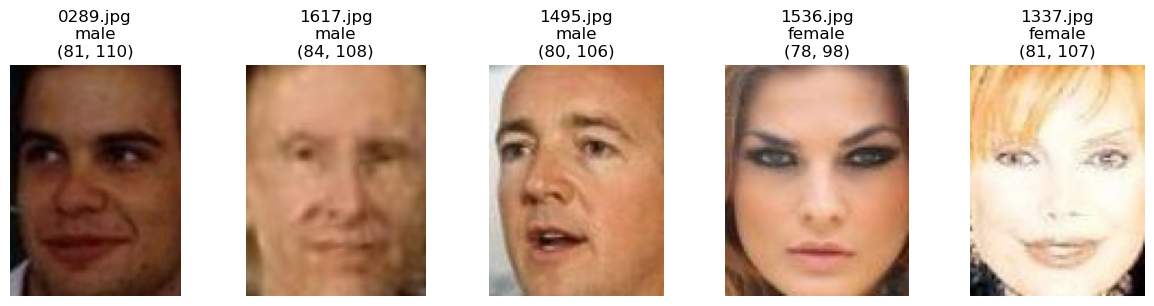

In [21]:

# def analyze_dataset(data_cleaning_path):
#     datagen = ImageDataGenerator()
#     data_flow = datagen.flow_from_directory(data_cleaning_path, target_size=(256, 256), class_mode='binary')
#     class_indices = data_flow.class_indices
#     classes = list(class_indices.keys())
#     num_classes = len(classes)
#     class_counts = {}
#     resolutions = []
#     for class_name in classes:
#         class_path = os.path.join(data_cleaning_path, class_name)
#         class_counts[class_name] = 0

#         for image_file in os.listdir(class_path):
#             image_path = os.path.join(class_path, image_file)
#             try:
#                 with Image.open(image_path) as img:
#                     resolutions.append(img.size) 
#                     class_counts[class_name] += 1
#             except IOError:
#                 print(f"Cannot open image: {image_path}")
#     resolutions = np.array(resolutions)
#     unique_resolutions, counts = np.unique(resolutions, axis=0, return_counts=True)
#     most_common_resolution = unique_resolutions[np.argmax(counts)]

#     print("Class labels:")
#     for class_name, label in class_indices.items():
#         print(f" - {class_name}: {label}")

#     return class_counts, most_common_resolution

# def get_image_hash(image_path):
#     with open(image_path, 'rb') as f:
#         return hashlib.md5(f.read()).hexdigest()

# def check_corrupted(image_path):
#     try:
#         with Image.open(image_path) as img:
#             img.verify()
#         return False
#     except (IOError, SyntaxError):
#         return True

# def check_dataset(directory):
#     hashes = set()
#     class_counts = {}
#     issues_found = False

#     for class_name in os.listdir(directory):
#         class_path = os.path.join(directory, class_name)
#         if not os.path.isdir(class_path):
#             continue

#         class_counts[class_name] = 0

#         for image_file in os.listdir(class_path):
#             image_path = os.path.join(class_path, image_file)

         
#             image_hash = get_image_hash(image_path)
#             if image_hash in hashes:
#                 print(f"Duplicate image found: {image_path}")
#                 issues_found = True
#                 continue
#             hashes.add(image_hash)

   
#             if check_corrupted(image_path):
#                 print(f"Corrupted image found: {image_path}")
#                 issues_found = True
#                 continue

#             class_counts[class_name] += 1
#     min_count = min(class_counts.values())
#     max_count = max(class_counts.values())
#     if max_count > 1.5 * min_count: 
#         print("Class imbalance detected.")
#         issues_found = True

#     return issues_found

# def display_sample_images_with_info(directory, num_images=5):
#     images = []
#     labels = []

#     for class_name in os.listdir(directory):
#         class_path = os.path.join(directory, class_name)
#         if not os.path.isdir(class_path):
#             continue

#         image_files = os.listdir(class_path)
#         images += [os.path.join(class_path, file) for file in image_files]
#         labels += [class_name for _ in image_files]

#     selected_indices = random.sample(range(len(images)), num_images)
#     sample_images = [images[i] for i in selected_indices]
#     sample_labels = [labels[i] for i in selected_indices]

#     plt.figure(figsize=(15, 3))
#     for i, image_path in enumerate(sample_images):
#         img = Image.open(image_path)
#         plt.subplot(1, num_images, i+1)
#         plt.imshow(img)
#         plt.title(os.path.basename(image_path)+'\n'+f'{sample_labels[i]}\n{img.size}')
#         plt.axis('off')
    
#     plt.show()

# data_cleaning_path = 'Image_Datasets/Original_Dataset'  
# class_counts, most_common_resolution = analyze_dataset(data_cleaning_path)

# print("Number of samples per class:", class_counts)
# print("Most common resolution:", most_common_resolution)
# if not check_dataset(data_cleaning_path):
#     print("No issues found in the dataset.")
# display_sample_images_with_info(data_cleaning_path)


    Data augmentation

In [22]:
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# def copy_original_images(source_dir, target_dir, class_name):

#     source_class_dir = os.path.join(source_dir, class_name)
#     target_class_dir = os.path.join(target_dir, class_name)

#     if not os.path.exists(target_class_dir):
#         os.makedirs(target_class_dir)

#     for filename in os.listdir(source_class_dir):
#         source_path = os.path.join(source_class_dir, filename)
#         target_path = os.path.join(target_class_dir, filename)
#         shutil.copy2(source_path, target_path)

# def augment_images(source_dir, class_name, target_dir, target_count, generator):

#     source_class_dir = os.path.join(source_dir, class_name)
#     target_class_dir = os.path.join(target_dir, class_name)
    
#     if not os.path.exists(target_class_dir):
#         os.makedirs(target_class_dir)

#     current_count = len(os.listdir(source_class_dir))
#     required_count = target_count - current_count
#     print(f"{class_name}: There ara currently {current_count} images, and {required_count} images need to be enhanced.")

#     if required_count <= 0:
#         print(f"{class_name}: The target number has been reached and no enhancement is required.")
#         return

#     flow = generator.flow_from_directory(
#         directory=source_dir,
#         classes=[class_name],
#         target_size=(120, 100),
#         batch_size=32,
#         class_mode='categorical',  
#         save_to_dir=target_class_dir,
#         save_prefix='aug_',
#         save_format='png'
#     )

#     num_batches = required_count // 32 + (1 if required_count % 32 > 0 else 0)
#     for i in range(num_batches):
#         next(flow)
#         if len(os.listdir(target_class_dir)) >= target_count:
#             break

# original_dataset_dir = 'Image_Datasets/original_dataset'
# augmented_dataset_dir = 'Image_Datasets/augmented_dataset'

# for class_name in ['female', 'male']:
#     copy_original_images(original_dataset_dir, augmented_dataset_dir, class_name)

# for class_name in ['female', 'male']:
#     augment_images(original_dataset_dir, class_name, augmented_dataset_dir, 5000, datagen)

# print("Done!")


female: There ara currently 1947 images, and 3053 images need to be enhanced.
Found 1947 images belonging to 1 classes.
male: There ara currently 1944 images, and 3056 images need to be enhanced.
Found 1944 images belonging to 1 classes.
Done!


    Data Split

In [4]:
def split_dataset(original_dir, target_dir, train_ratio=0.9, val_ratio=0.05):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
        os.makedirs(os.path.join(target_dir, 'train'))
        os.makedirs(os.path.join(target_dir, 'validation'))
        os.makedirs(os.path.join(target_dir, 'test'))

    classes = [d for d in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir, d))]

    for cls in classes:
        os.makedirs(os.path.join(target_dir, 'train', cls))
        os.makedirs(os.path.join(target_dir, 'validation', cls))
        os.makedirs(os.path.join(target_dir, 'test', cls))

        all_images = os.listdir(os.path.join(original_dir, cls))
        np.random.shuffle(all_images)

        train_end = int(len(all_images) * train_ratio)
        val_end = train_end + int(len(all_images) * val_ratio)

        for i, img in enumerate(all_images):
            if i < train_end:
                subset = 'train'
            elif i < val_end:
                subset = 'validation'
            else:
                subset = 'test'

            src = os.path.join(original_dir, cls, img)
            dst = os.path.join(target_dir, subset, cls, img)
            shutil.copy(src, dst)

def count_images_in_subfolders(directory):
    counts = {}
    for subset in ['train', 'validation', 'test']:
        subset_path = os.path.join(directory, subset)
        for cls in os.listdir(subset_path):
            class_path = os.path.join(subset_path, cls)
            if os.path.isdir(class_path):
                count = len(os.listdir(class_path))
                counts[f"{subset}/{cls}"] = count
    return counts


augmented_dataset_dir = "Image_Datasets/augmented_dataset"
splited_dataset_dir = "Image_Datasets/splited_dataset"

split_dataset(augmented_dataset_dir, splited_dataset_dir)

train/female: 4512 images
train/male: 4507 images
validation/female: 250 images
validation/male: 250 images
test/female: 252 images
test/male: 251 images


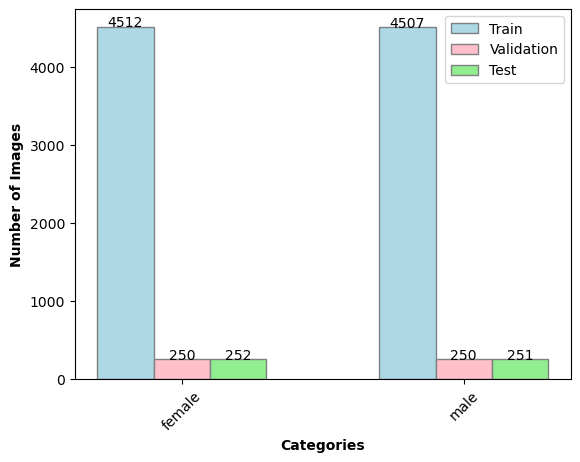

In [5]:
counts = count_images_in_subfolders(splited_dataset_dir)
for key, count in counts.items():
    print(f"{key}: {count} images")

def visualize_data_splits(train_dir, validation_dir, test_dir):
    categories = set()
    data = {'train': {}, 'validation': {}, 'test': {}}

    for dataset, directory in zip(['train', 'validation', 'test'], [train_dir, validation_dir, test_dir]):
        for category in os.listdir(directory):
            category_path = os.path.join(directory, category)
            if os.path.isdir(category_path):
                categories.add(category)
                data[dataset][category] = len(os.listdir(category_path))

    categories = sorted(list(categories))
    
    bar_width = 0.2
    r1 = np.arange(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    plt.bar(r1, [data['train'].get(category, 0) for category in categories], color='#ADD8E6', width=bar_width, edgecolor='grey', label='Train')
    plt.bar(r2, [data['validation'].get(category, 0) for category in categories], color='#FFC0CB', width=bar_width, edgecolor='grey', label='Validation')
    plt.bar(r3, [data['test'].get(category, 0) for category in categories], color='#90EE90', width=bar_width, edgecolor='grey', label='Test')

    plt.xlabel('Categories', fontweight='bold')
    plt.ylabel('Number of Images', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(categories))], categories, rotation=45)
    plt.legend()

    def add_labels(r, dataset):
        for i in range(len(categories)):
            plt.text(x=r[i], y=data[dataset][categories[i]] + 5, s=data[dataset][categories[i]], ha='center')

    add_labels(r1, 'train')
    add_labels(r2, 'validation')
    add_labels(r3, 'test')

    plt.show()

splited_dataset_dir = "Image_Datasets/Splited_Dataset"
train_dir = os.path.join(splited_dataset_dir, 'train')
validation_dir = os.path.join(splited_dataset_dir, 'validation')
test_dir = os.path.join(splited_dataset_dir, 'test')

visualize_data_splits(train_dir, validation_dir, test_dir)


    Data Preprocessing

In [2]:
def preprocess_data():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_test_datagen = ImageDataGenerator(rescale=1./255)
    return train_datagen, val_test_datagen

def load_datasets(train_datagen, val_test_datagen, batch_size=64, target_size=(120, 100)):
    train_dir = "Image_Datasets/splited_dataset/train" 
    val_dir = "Image_Datasets/splited_dataset/validation"
    test_dir = "Image_Datasets/splited_dataset/test"

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
    )

    validation_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb'
    )

    return train_generator, validation_generator, test_generator

train_datagen, val_test_datagen = preprocess_data()
train_generator, validation_generator, test_generator = load_datasets(train_datagen, val_test_datagen)


Found 9019 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 503 images belonging to 2 classes.


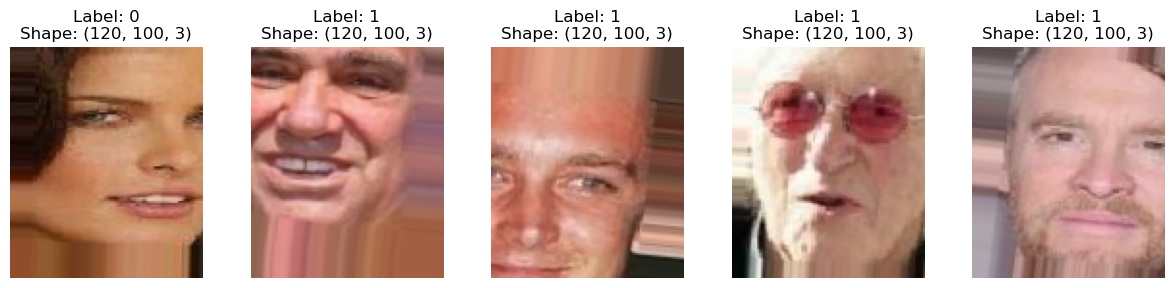

In [5]:
def display_sample_images_with_info_after_preprocessing(generator, num_images=5):
    images, labels = next(generator)

    selected_indices = np.random.choice(images.shape[0], num_images, replace=False)

    plt.figure(figsize=(15, 3))
    for i, index in enumerate(selected_indices):
        img = images[index]
        label = labels[index]
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f'Label: {np.argmax(label)}\nShape: {img.shape}')
        plt.axis('off')

    plt.show()

display_sample_images_with_info_after_preprocessing(train_generator)

# **Model Construction**

    Model 1

In [3]:
def depthwise_separable_resnet_block(input_tensor, filters, kernel_size=3, stride=1,conv_shortcut=False):
    
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D(kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    if conv_shortcut or stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding="same")(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

def squeeze_excitation_block(input_tensor, ratio=16):
    channel_axis = -1
    filters = input_tensor.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape(se_shape)(se)
    se = layers.Dense(filters // ratio, activation='relu', kernel_regularizer=l2(0.01), use_bias=False)(se)
    se = layers.Dense(filters, activation='sigmoid', kernel_regularizer=l2(0.01), use_bias=False)(se)

    x = layers.multiply([input_tensor, se])
    return x


def inception_with_SE_block(input_tensor, filters, l2_rate):

    conv1x1 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(input_tensor)

    conv3x3 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(input_tensor)

    conv5x5_1 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(input_tensor)
    conv5x5_2 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(conv5x5_1)
    conv5x5_3 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(conv5x5_2)

    pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    pool_conv = layers.Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(pool)

    outputs = layers.concatenate([conv1x1, conv3x3, conv5x5_3, pool_conv], axis=-1)
    output_with_se = squeeze_excitation_block(outputs)
    return output_with_se


    Model 2

In [4]:
def resnet_block(input_tensor, filters, kernel_size=3, stride=1, conv_shortcut=False):
  
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    if conv_shortcut or stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding="same")(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def inception_model(input_tensor, filters, l2_rate):

    conv1x1 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(input_tensor)

    conv3x3 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(conv1x1)

    conv5x5 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(input_tensor)
    conv5x5 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(conv5x5)
    conv5x5 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(conv5x5)

    pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    pool_conv = layers.Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(l2_rate))(pool)

    output = layers.concatenate([conv1x1, conv3x3, conv5x5, pool_conv], axis=-1)
    return output


    Spatial Attention and Effect

In [5]:
def spatial_attention_block(input_tensor):
    avg_pool = layers.GlobalAveragePooling2D()(input_tensor)
    max_pool = layers.GlobalMaxPooling2D()(input_tensor)
    
    avg_pool = layers.Reshape((1, 1, input_tensor.shape[-1]))(avg_pool)
    max_pool = layers.Reshape((1, 1, input_tensor.shape[-1]))(max_pool)
    
    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    attention = layers.Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)

    output_tensor = layers.Multiply()([input_tensor, attention])
    return output_tensor


input_1 InputLayer
conv2d Conv2D
batch_normalization BatchNormalization
re_lu ReLU
conv2d_1 Conv2D
batch_normalization_1 BatchNormalization
re_lu_1 ReLU
depthwise_conv2d DepthwiseConv2D
batch_normalization_2 BatchNormalization
conv2d_2 Conv2D
re_lu_2 ReLU
batch_normalization_3 BatchNormalization
add Add
re_lu_3 ReLU
conv2d_3 Conv2D
batch_normalization_4 BatchNormalization
re_lu_4 ReLU
conv2d_4 Conv2D
batch_normalization_5 BatchNormalization
re_lu_5 ReLU
depthwise_conv2d_1 DepthwiseConv2D
batch_normalization_6 BatchNormalization
conv2d_5 Conv2D
re_lu_6 ReLU
batch_normalization_7 BatchNormalization
add_1 Add
re_lu_7 ReLU
conv2d_6 Conv2D
max_pooling2d MaxPooling2D
conv2d_9 Conv2D
conv2d_10 Conv2D
max_pooling2d_1 MaxPooling2D
conv2d_7 Conv2D
conv2d_8 Conv2D
conv2d_11 Conv2D
conv2d_12 Conv2D
concatenate Concatenate
global_average_pooling2d GlobalAveragePooling2D
reshape Reshape
dense Dense
dense_1 Dense
multiply Multiply
max_pooling2d_2 MaxPooling2D
global_average_pooling2d_1 GlobalAverageP

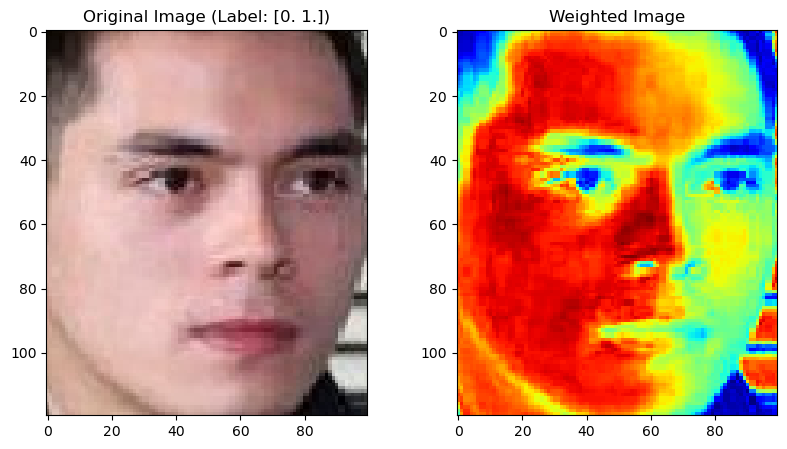

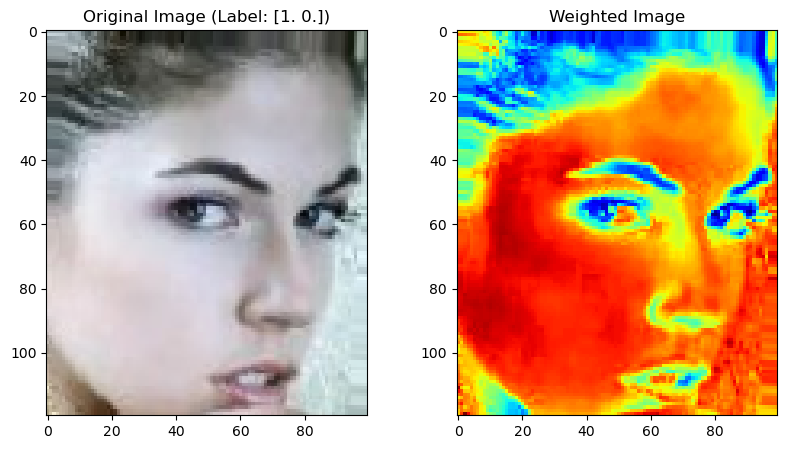

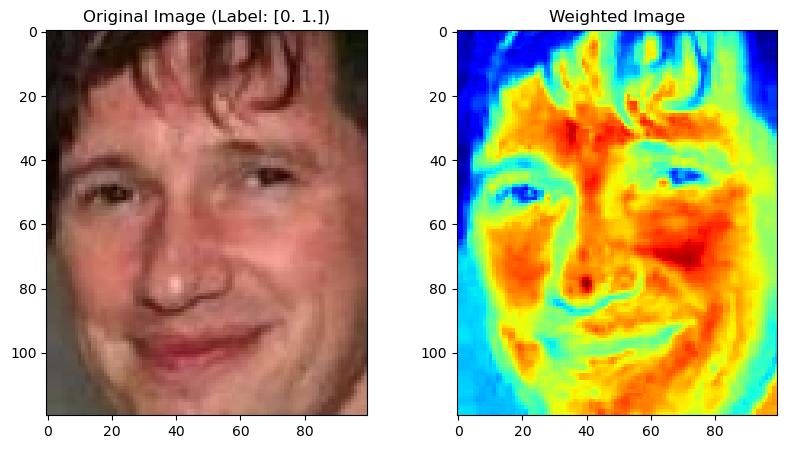

In [10]:
def attention_visualization_model(input_shape, num_classes, l2_rate):
    inputs = layers.Input(shape=input_shape)

    x = depthwise_separable_resnet_block(inputs, filters=64)
    x = depthwise_separable_resnet_block(x, filters=32)

    x = layers.Conv2D(32, (5, 5), strides=2, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)
    x = inception_with_SE_block(x, 32, l2_rate)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x) 
    x = spatial_attention_block(x)
    x = inception_with_SE_block(x, 32, l2_rate)
    x = spatial_attention_block(x) 
    x = layers.GlobalAveragePooling2D()(x)
    

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    attention_visualization_model = models.Model(inputs=inputs, outputs=outputs)
    return attention_visualization_model

def generate_grad_cam(model, img_array, target_layer, output_layer):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(target_layer).output, model.get_layer(output_layer).output]
    )

    with tf.GradientTape() as tape:
        conv_output, model_output = grad_model(img_array)
        loss = tf.reduce_max(model_output, axis=1)
    grads = tape.gradient(loss, conv_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        conv_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1

    return heatmap
input_shape = (120, 100, 3)
model = attention_visualization_model(input_shape, num_classes=2, l2_rate=0.0001)
for layer in model.layers:
    print(layer.name, layer.__class__.__name__)


def find_last_conv_layer_name(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No convolutional layers found in the model.")

last_conv_layer_name = find_last_conv_layer_name(model)
print(last_conv_layer_name)

output_layer_name = model.output.name.split("/")[0]

num_images = 3 

for i in range(num_images):
    batch = next(test_generator)

    img_array = batch[0]
    label = batch[1]

    heatmap1 = generate_grad_cam(model, img_array, last_conv_layer_name, output_layer_name)


    target_size = heatmap1.shape[0], heatmap1.shape[1]
    heatmap1_resized = tf.image.resize(heatmap1[..., np.newaxis], target_size)[..., 0]

    heatmap = heatmap1_resized 

    heatmap_resized = tf.image.resize(heatmap[..., np.newaxis], (input_shape[0], input_shape[1]))[..., 0]
    heatmap_expanded = tf.stack([heatmap_resized, heatmap_resized, heatmap_resized], axis=-1)


    weighted_img = heatmap_expanded * img_array[0]
    weighted_img /= np.max(weighted_img) if np.max(weighted_img) != 0 else 1


    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_array[0])
    plt.title(f'Original Image (Label: {label[0]})')

    plt.subplot(1, 3, 2)
    plt.imshow(weighted_img[..., 0],cmap='jet')
    plt.title('Weighted Image')

    plt.show()


    Ensemble model

In [6]:
def Franklin_ensemble_model_1(input_shape, num_classes, l2_rate):
    inputs = layers.Input(shape=input_shape)

    x = depthwise_separable_resnet_block(inputs, filters=64)
    x = depthwise_separable_resnet_block(x, filters=32)
    x = spatial_attention_block(x)

    x = layers.Conv2D(32, (5, 5), strides=2, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    x = inception_with_SE_block(x, 32, l2_rate)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x) 
      
    x = inception_with_SE_block(x, 32, l2_rate) 
    x = spatial_attention_block(x) 
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    combined_model_with_attention = models.Model(inputs=inputs, outputs=outputs)
    return combined_model_with_attention

In [18]:
def Franklin_ensemble_model_2(input_shape, num_classes, l2_rate):
    inputs = layers.Input(shape=input_shape)

    x = resnet_block(inputs, filters=64)
    x = resnet_block(x, filters=64)
    x = spatial_attention_block(x)  

    x = layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_model(x, 32, l2_rate)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_model(x, 32, l2_rate)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    combined_model_with_attention = models.Model(inputs=inputs, outputs=outputs)
    return combined_model_with_attention

# **Model Training**

    Visualization of Loss, Accuracu, AUC, ROC, Precision, PRC, F1-score, Recall, Sensitivity, Specificity, Confusion Matrix.

In [7]:
def plot_training_history(history):
    acc = history.history['custom_accuracy']
    val_acc = history.history['val_custom_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']

    epochs = range(len(acc))


    plt.figure(figsize=(12, 12))

    plt.subplot(3, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(epochs, precision, label='Training Precision')
    plt.plot(epochs, val_precision, label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(epochs, recall, label='Training Recall')
    plt.plot(epochs, val_recall, label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    
    # plt.suptitle("Model using custom_categorical_crossentropy", fontsize=20)
    plt.tight_layout()
    plt.show()

def load_and_predict_model(model_path, test_generator, custom_objects):
    loaded_model = load_model(model_path, custom_objects=custom_objects)
    all_images = []
    all_true_labels = []

    for _ in range(test_generator.samples // test_generator.batch_size):
        images, true_labels = next(test_generator)
        all_images.extend(images)
        all_true_labels.extend(true_labels)

    all_images = np.array(all_images)
    all_true_labels = np.argmax(np.array(all_true_labels), axis=1)

    predictions = loaded_model.predict(all_images)
    predicted_labels = np.argmax(predictions, axis=1)

    return all_true_labels, predicted_labels, predictions

def calculate_f1_scores(true_labels, predicted_probabilities):
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []

    for thresh in thresholds:
        predicted_labels_thresh = (predicted_probabilities[:, 1] >= thresh).astype(int)

        precision = precision_score(true_labels, predicted_labels_thresh, zero_division=0)
        recall = recall_score(true_labels, predicted_labels_thresh)

        if precision + recall == 0:
            f1_scores.append(0)
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
            f1_scores.append(f1)

    return thresholds, f1_scores

def calculate_sensitivity_specificity(true_labels, predicted_probabilities):
    thresholds = np.linspace(0, 1, 100)
    sensitivity_scores = []
    specificity_scores = []

    for thresh in thresholds:
        predicted_labels_thresh = (predicted_probabilities[:, 1] >= thresh).astype(int)

        tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels_thresh).ravel()

        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)

    return thresholds, sensitivity_scores, specificity_scores


def plot_confusion_matrix(true_labels, predicted_labels):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


def plot_roc_auc_curve(true_labels, predicted_probabilities):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities[:, 1]) 
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (Area Under the Curve = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(true_labels, predicted_probabilities):
    precision, recall, _ = precision_recall_curve(true_labels, predicted_probabilities[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

def plot_f1_scores(thresholds, f1_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1_scores, marker='.')
    plt.title('F1-Score as a function of the decision threshold')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.show()

def plot_sensitivity(thresholds, sensitivity_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, sensitivity_scores, marker='.')
    plt.title('Sensitivity as a function of the decision threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Sensitivity')
    plt.show()

def plot_specificity(thresholds, specificity_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, specificity_scores, marker='.')
    plt.title('Specificity as a function of the decision threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Specificity')
    plt.show()

def print_classification_metrics(true_labels, predicted_labels, predicted_probabilities):
    cm = confusion_matrix(true_labels, predicted_labels)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_probabilities[:, 1]) if predicted_probabilities is not None else "N/A"

    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels))
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc}")
    print("Confusion Matrix:")
    print(cm)
    


    Customize loss and Accuracy

In [8]:
def custom_categorical_crossentropy(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
    loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
    return loss

def custom_accuracy(y_true, y_pred):
    predicted_classes = tf.argmax(y_pred, axis=1)
    true_classes = tf.argmax(y_true, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_classes, true_classes), tf.float32))
    return accuracy

    Training model using custom custom_categorical_crossentropy and custom_accuracy

        Training model 1

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_1 = Franklin_ensemble_model_1((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss=custom_categorical_crossentropy,
                       metrics=[custom_accuracy, Precision(name='precision'), Recall(name='recall')]
)
Franklin_ensemble_model_1.summary()
print(Franklin_ensemble_model_1.optimizer) 
print(Franklin_ensemble_model_1.loss)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
history1 = Franklin_ensemble_model_1.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])

Epoch 1/50
141/141 [==============================] - 16s 101ms/step - loss: 1.1124 - custom_accuracy: 0.5713 - precision: 0.5713 - recall: 0.5713 - val_loss: 0.8200 - val_custom_accuracy: 0.5005 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 2/50
141/141 [==============================] - 14s 96ms/step - loss: 0.7121 - custom_accuracy: 0.6264 - precision: 0.6263 - recall: 0.6263 - val_loss: 0.7991 - val_custom_accuracy: 0.5036 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 3/50
141/141 [==============================] - 14s 96ms/step - loss: 0.5931 - custom_accuracy: 0.7206 - precision: 0.7206 - recall: 0.7206 - val_loss: 0.9897 - val_custom_accuracy: 0.4982 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 4/50
141/141 [==============================] - 14s 95ms/step - loss: 0.4477 - custom_accuracy: 0.8068 - precision: 0.8067 - recall: 0.8067 - val_loss: 0.7174 - val_custom_accuracy: 0.6214 - val_precision: 0.6220 - val_recall: 0.6220 

In [11]:
model_path1 = 'modelsave/Franklin_ensemble_model_1.h5'
Franklin_ensemble_model_1.save(model_path1)


        Train model 2

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_2 = Franklin_ensemble_model_2((120, 100, 3), num_classes=2, l2_rate=0.01)
Franklin_ensemble_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss=custom_categorical_crossentropy,
                       metrics=[custom_accuracy, Precision(name='precision'), Recall(name='recall')]
)
Franklin_ensemble_model_2.summary()
print(Franklin_ensemble_model_2.optimizer) 
print(Franklin_ensemble_model_2.loss)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 120, 100, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 120, 100, 64  256        ['conv2d_42[0][0]']              
 ormalization)                  )                                                           

In [25]:
history2 = Franklin_ensemble_model_2.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])

Epoch 1/50
141/141 [==============================] - 15s 98ms/step - loss: 2.5961 - custom_accuracy: 0.5242 - precision: 0.5242 - recall: 0.5242 - val_loss: 1.3227 - val_custom_accuracy: 0.4977 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 2/50
141/141 [==============================] - 14s 96ms/step - loss: 0.9551 - custom_accuracy: 0.6429 - precision: 0.6430 - recall: 0.6430 - val_loss: 0.8017 - val_custom_accuracy: 0.5822 - val_precision: 0.5800 - val_recall: 0.5800 - lr: 0.0010
Epoch 3/50
141/141 [==============================] - 14s 96ms/step - loss: 0.5669 - custom_accuracy: 0.7751 - precision: 0.7750 - recall: 0.7750 - val_loss: 0.6068 - val_custom_accuracy: 0.6955 - val_precision: 0.6960 - val_recall: 0.6960 - lr: 0.0010
Epoch 4/50
141/141 [==============================] - 14s 95ms/step - loss: 0.4418 - custom_accuracy: 0.8192 - precision: 0.8192 - recall: 0.8192 - val_loss: 0.3716 - val_custom_accuracy: 0.8576 - val_precision: 0.8560 - val_recall: 0.8560 -

In [26]:
model_path2 = 'modelsave/Franklin_ensemble_model_2.h5'
Franklin_ensemble_model_2.save(model_path2)

# **Model Testing and Evaluation**

    Evaluate and Visualize Loss, Accuracy, AUC, ROC, Precision, PRC, F1-score, Recall, Sensitivity, Specificity, Confusion Matrix.

        Model 1 testing and evaluation

14/14 [==============================] - 0s 9ms/step


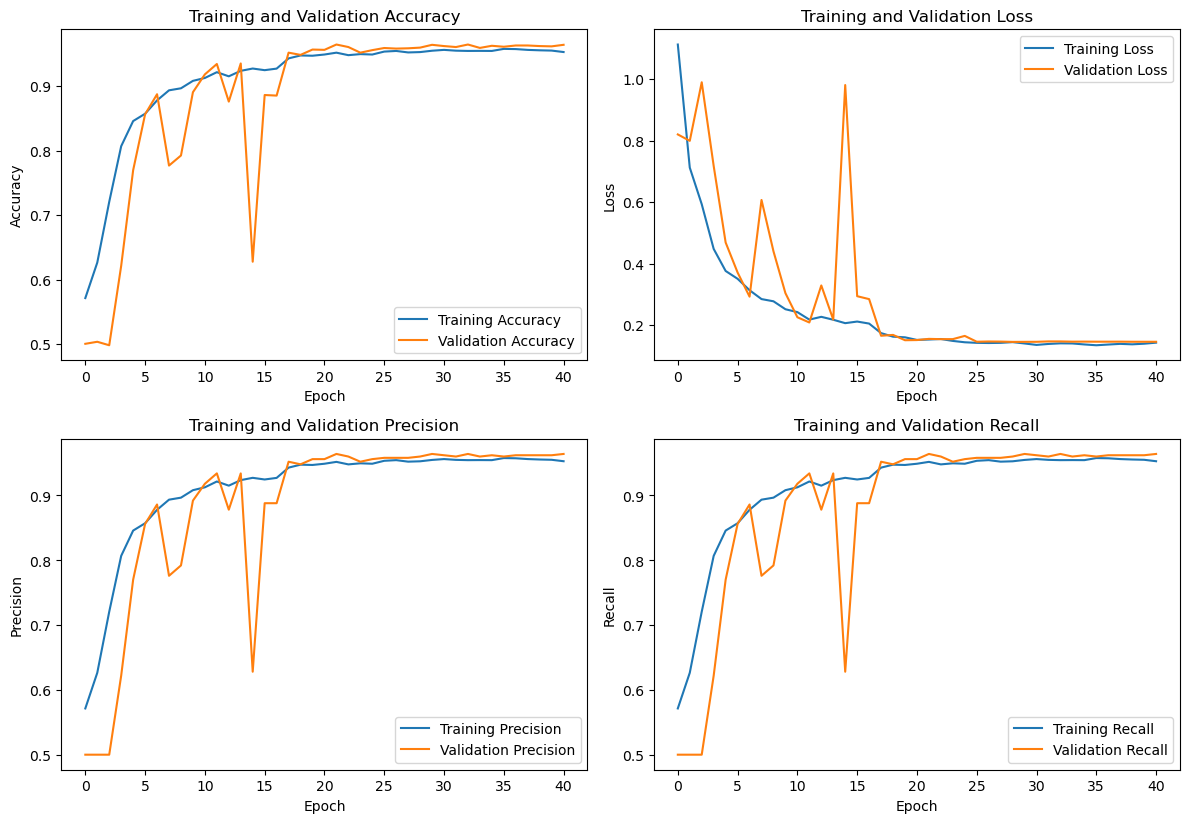

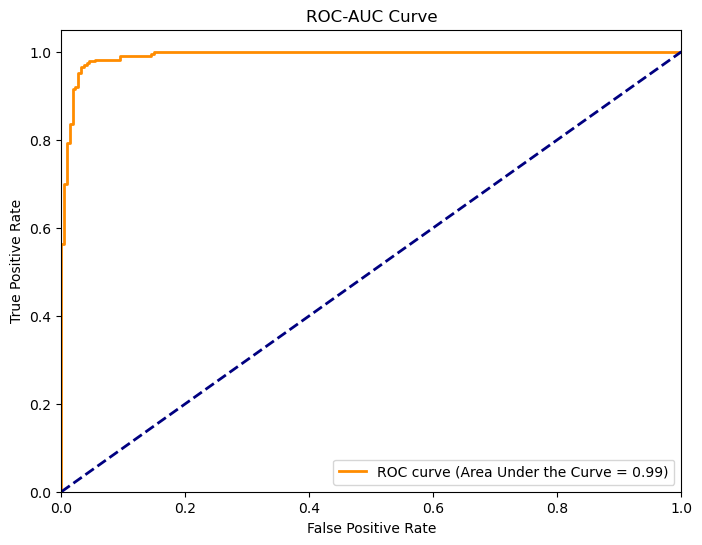

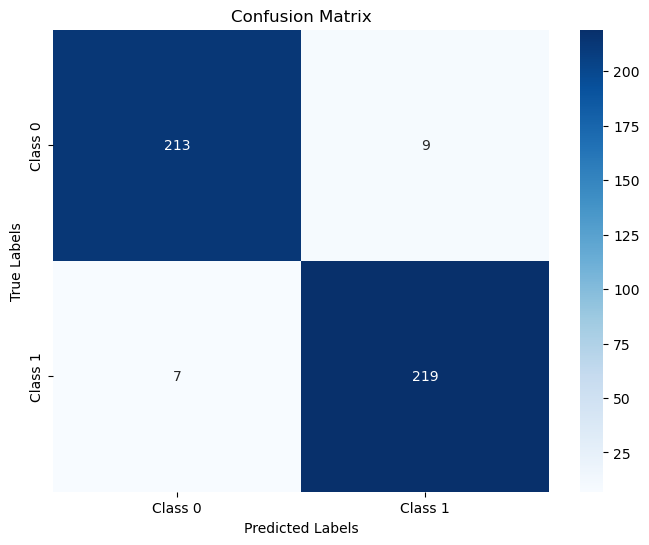

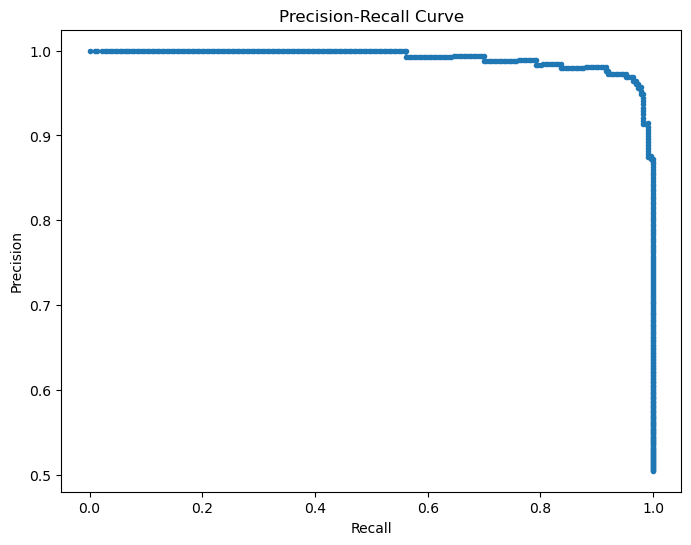

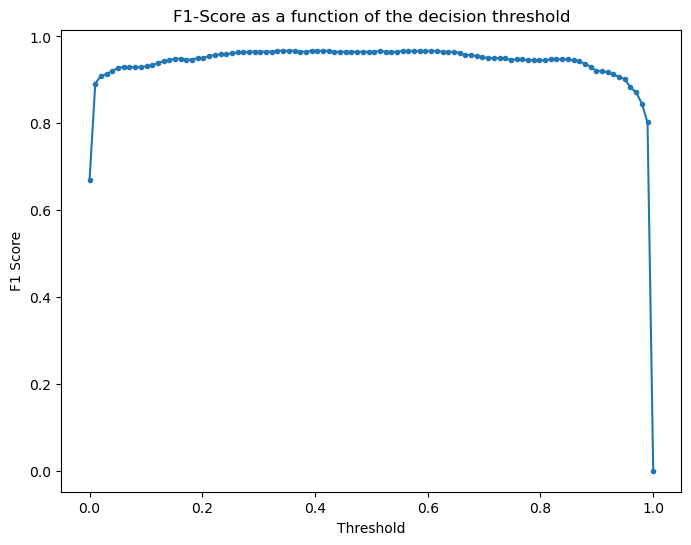

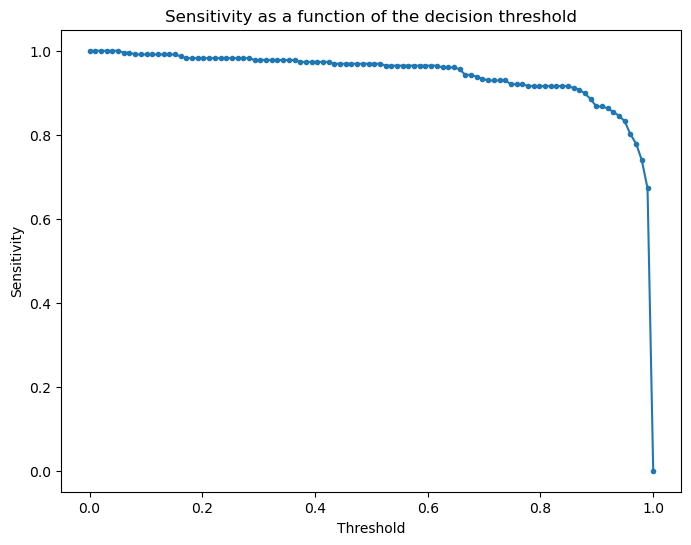

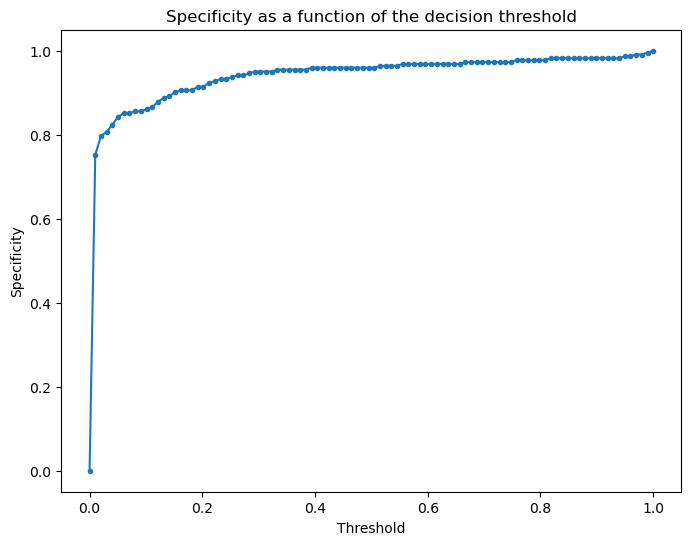

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       222
           1       0.96      0.97      0.96       226

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448

Sensitivity: 0.97
Specificity: 0.96
Precision: 0.96
Recall: 0.97
F1 Score: 0.96
AUC: 0.9922466714502112
Confusion Matrix:
[[213   9]
 [  7 219]]
7/7 [==============================] - 0s 25ms/step - loss: 0.1234 - custom_accuracy: 0.9643 - precision: 0.9643 - recall: 0.9643


In [12]:
model_path = model_path1
custom_objects={'custom_categorical_crossentropy': custom_categorical_crossentropy,'custom_accuracy': custom_accuracy}
true_labels, predicted_labels, predicted_probabilities = load_and_predict_model(model_path, test_generator, custom_objects)


plot_training_history(history1)

plot_roc_auc_curve(true_labels, predicted_probabilities)
plot_confusion_matrix(true_labels, predicted_labels)
plot_precision_recall_curve(true_labels, predicted_probabilities)

thresholds, f1_scores = calculate_f1_scores(true_labels, predicted_probabilities)
plot_f1_scores(thresholds, f1_scores)

thresholds, sensitivity_scores, specificity_scores = calculate_sensitivity_specificity(true_labels, predicted_probabilities)
plot_sensitivity(thresholds, sensitivity_scores)
plot_specificity(thresholds, specificity_scores)

print_classification_metrics(true_labels, predicted_labels, predicted_probabilities)


evaluation_result = Franklin_ensemble_model_1.evaluate(test_generator, steps=7)

1/1 [==============================] - 0s 206ms/step


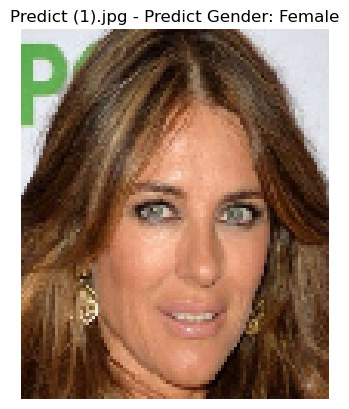

1/1 [==============================] - 0s 12ms/step


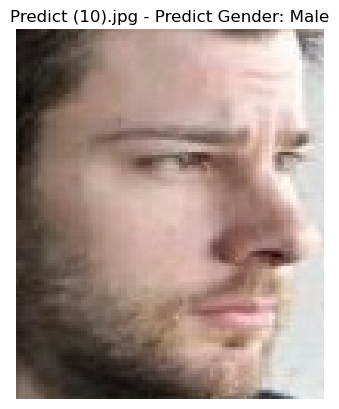

1/1 [==============================] - 0s 12ms/step


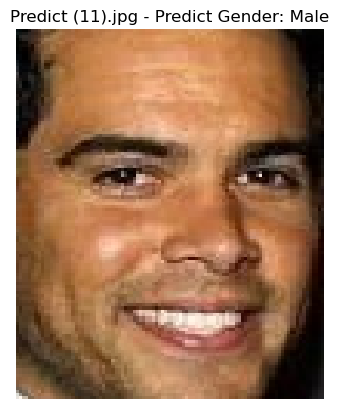

1/1 [==============================] - 0s 11ms/step


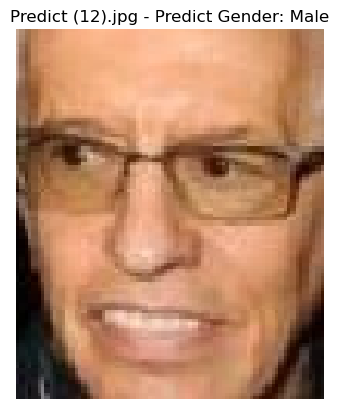

1/1 [==============================] - 0s 12ms/step


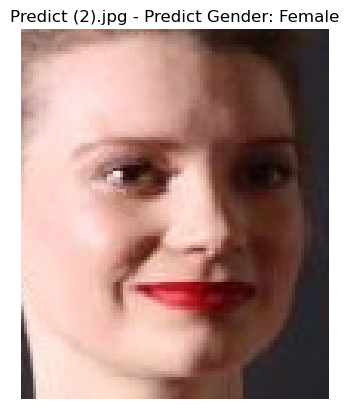

1/1 [==============================] - 0s 11ms/step


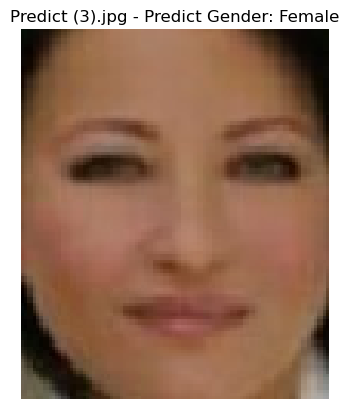

1/1 [==============================] - 0s 11ms/step


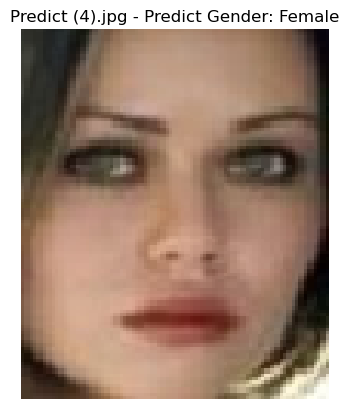

1/1 [==============================] - 0s 11ms/step


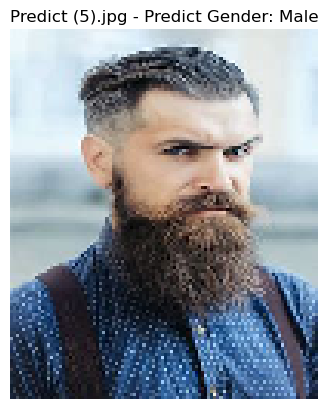

1/1 [==============================] - 0s 12ms/step


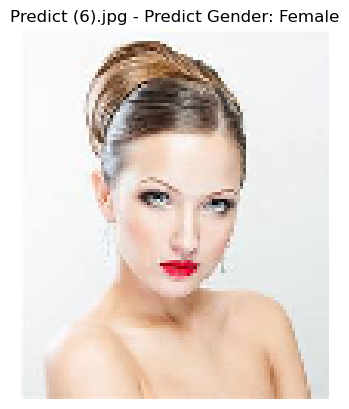

1/1 [==============================] - 0s 12ms/step


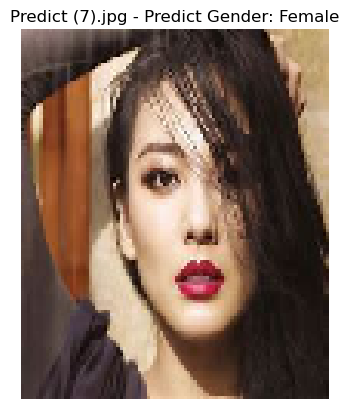

1/1 [==============================] - 0s 12ms/step


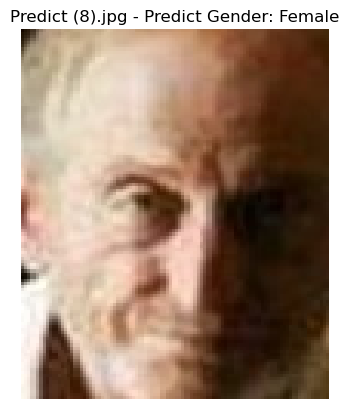

1/1 [==============================] - 0s 13ms/step


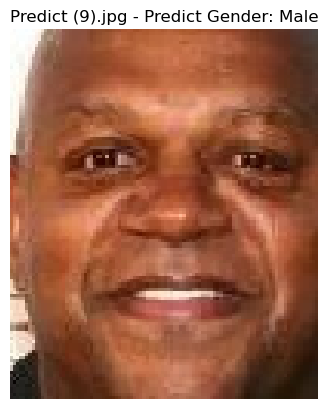

In [13]:
model = load_model(model_path1, custom_objects={'custom_categorical_crossentropy': custom_categorical_crossentropy, 'custom_accuracy': custom_accuracy})
folder_path = 'Image_Datasets/images to predict'  

for img_file in os.listdir(folder_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=(120, 100))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  
        img_array /= 255.0  

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        prediction_text = "Female" if predicted_class[0] == 0 else "Male"

        plt.imshow(img)
        plt.title(f"{img_file} - Predict Gender: {prediction_text}")
        plt.axis('off')  
        plt.show()

        Model 2 testing and evaluation

14/14 [==============================] - 0s 12ms/step


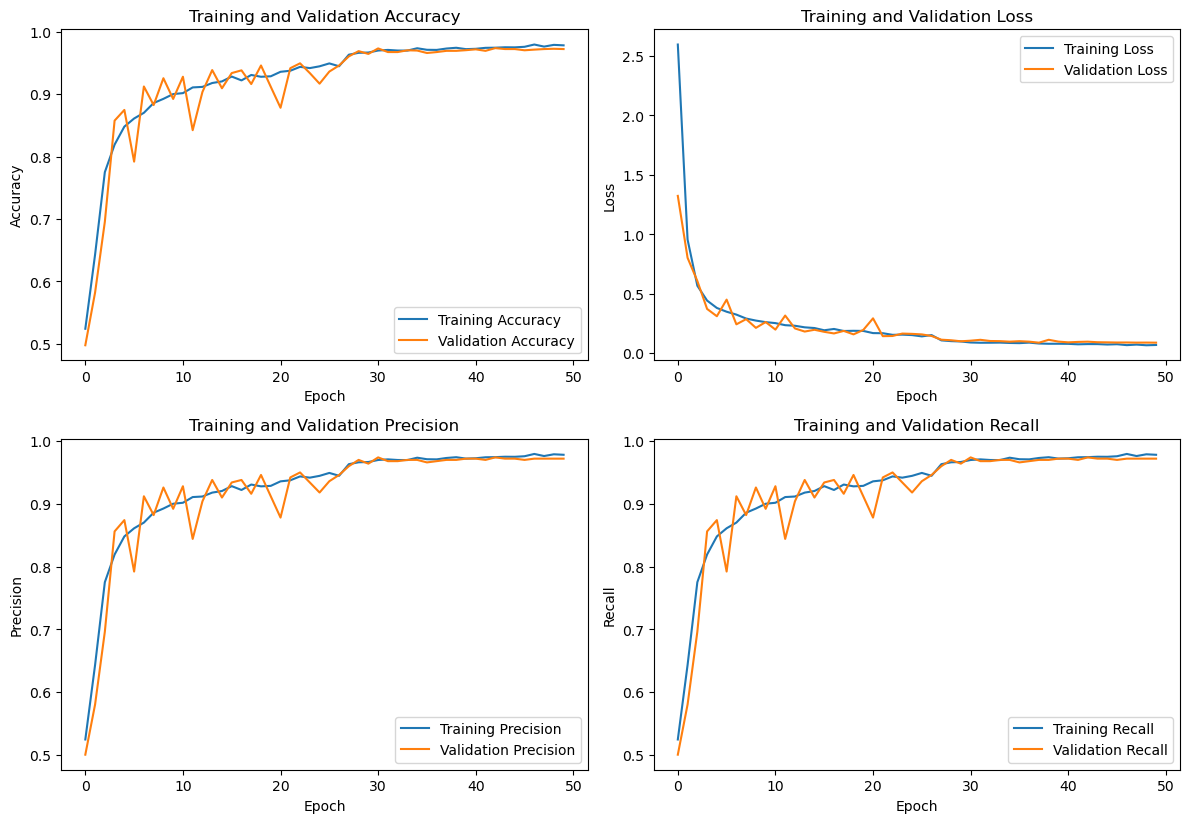

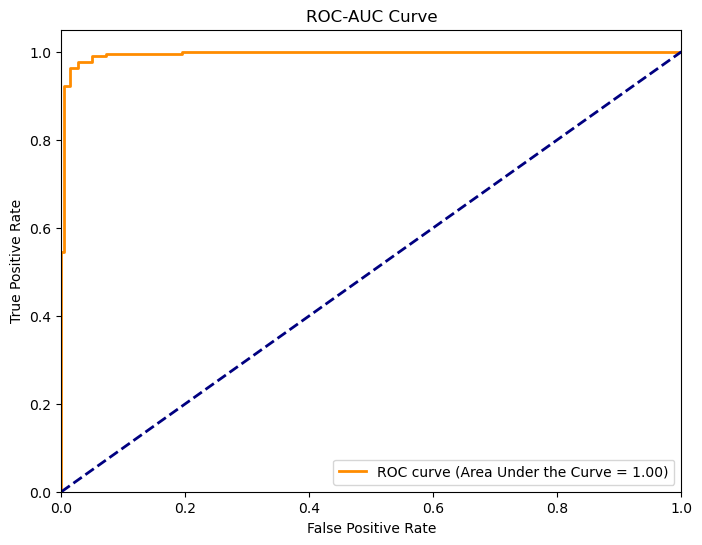

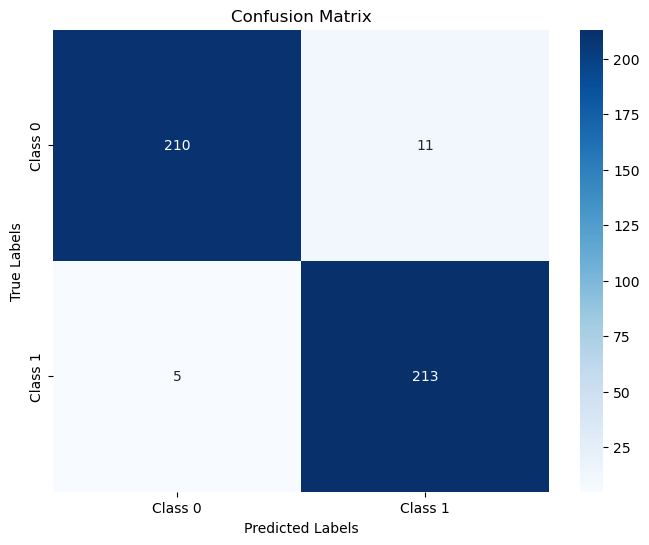

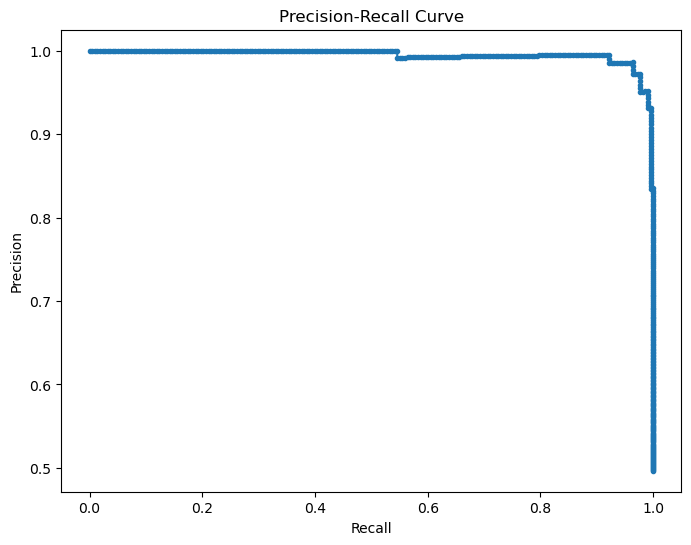

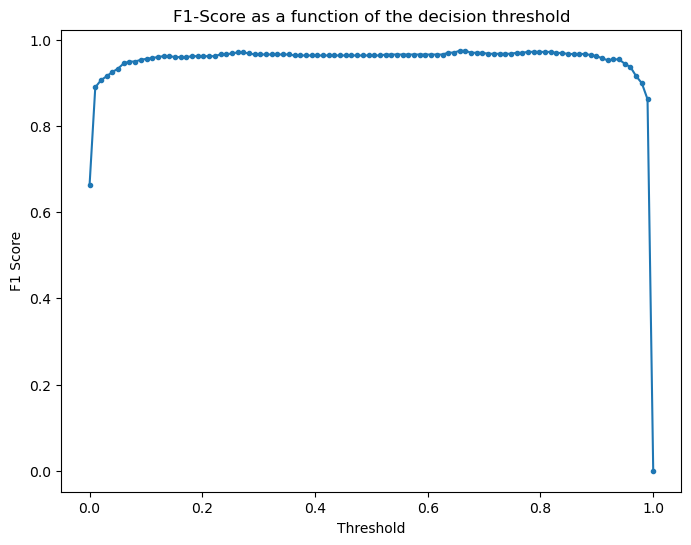

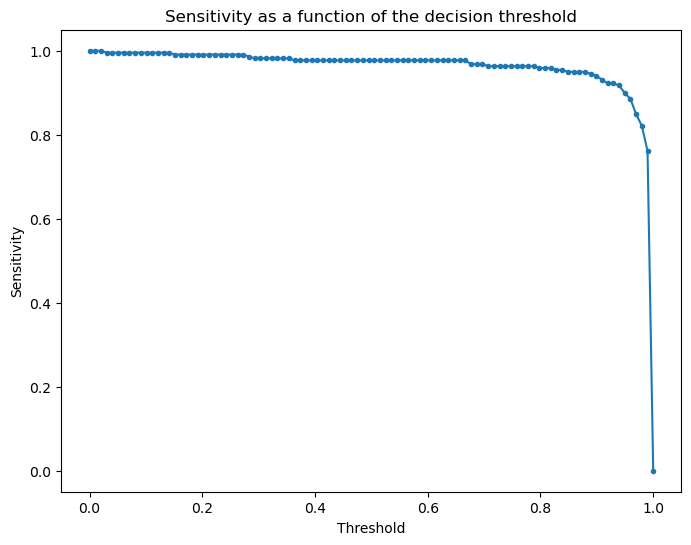

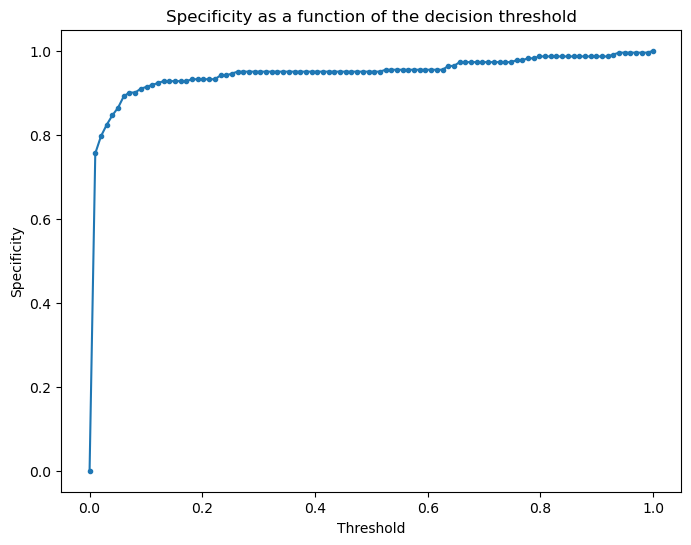

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       221
           1       0.95      0.98      0.96       218

    accuracy                           0.96       439
   macro avg       0.96      0.96      0.96       439
weighted avg       0.96      0.96      0.96       439

Sensitivity: 0.98
Specificity: 0.95
Precision: 0.95
Recall: 0.98
F1 Score: 0.96
AUC: 0.9954543567603471
Confusion Matrix:
[[210  11]
 [  5 213]]
7/7 [==============================] - 0s 27ms/step - loss: 0.1006 - custom_accuracy: 0.9598 - precision: 0.9598 - recall: 0.9598


In [28]:
model_path = model_path2
custom_objects={'custom_categorical_crossentropy': custom_categorical_crossentropy,'custom_accuracy': custom_accuracy}
true_labels, predicted_labels, predicted_probabilities = load_and_predict_model(model_path, test_generator, custom_objects)


plot_training_history(history2)

plot_roc_auc_curve(true_labels, predicted_probabilities)
plot_confusion_matrix(true_labels, predicted_labels)
plot_precision_recall_curve(true_labels, predicted_probabilities)

thresholds, f1_scores = calculate_f1_scores(true_labels, predicted_probabilities)
plot_f1_scores(thresholds, f1_scores)

thresholds, sensitivity_scores, specificity_scores = calculate_sensitivity_specificity(true_labels, predicted_probabilities)
plot_sensitivity(thresholds, sensitivity_scores)
plot_specificity(thresholds, specificity_scores)

print_classification_metrics(true_labels, predicted_labels, predicted_probabilities)


evaluation_result = Franklin_ensemble_model_2.evaluate(test_generator, steps=7)

1/1 [==============================] - 0s 131ms/step


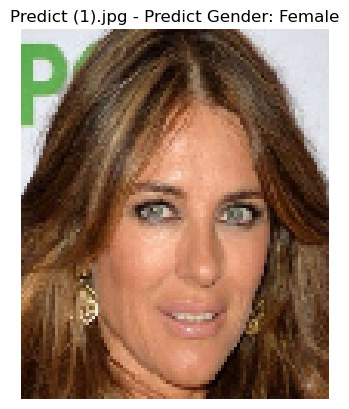

1/1 [==============================] - 0s 12ms/step


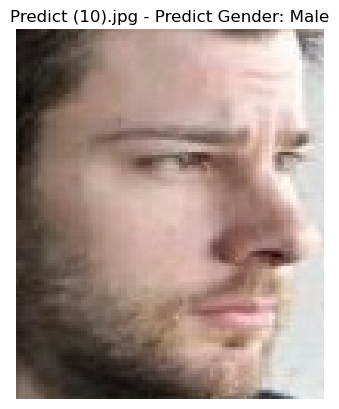

1/1 [==============================] - 0s 10ms/step


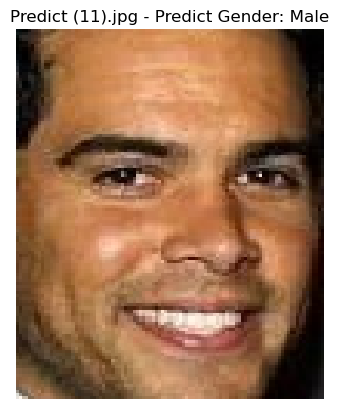

1/1 [==============================] - 0s 11ms/step


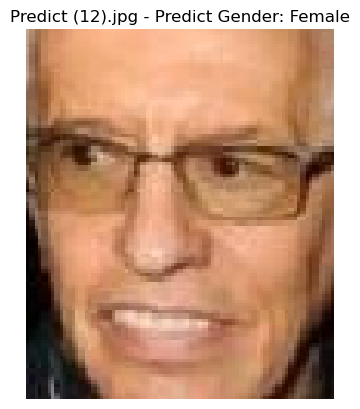

1/1 [==============================] - 0s 12ms/step


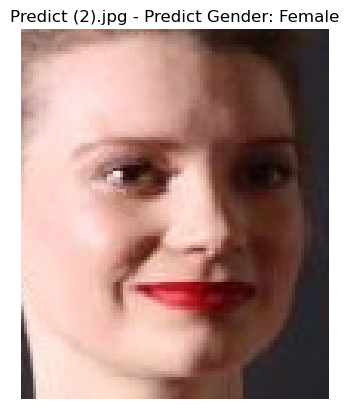

1/1 [==============================] - 0s 11ms/step


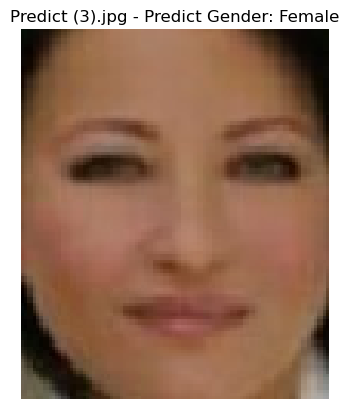

1/1 [==============================] - 0s 10ms/step


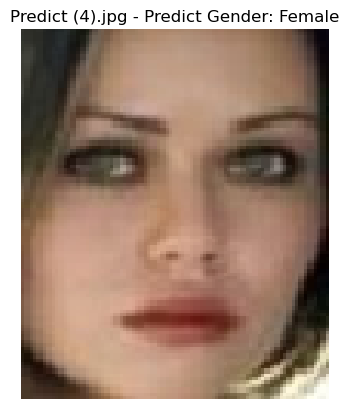

1/1 [==============================] - 0s 12ms/step


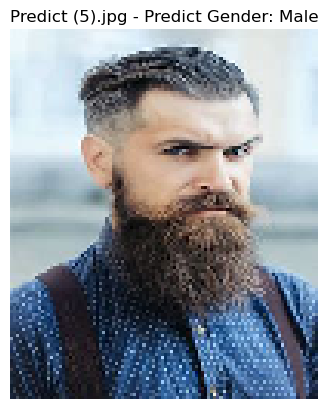

1/1 [==============================] - 0s 10ms/step


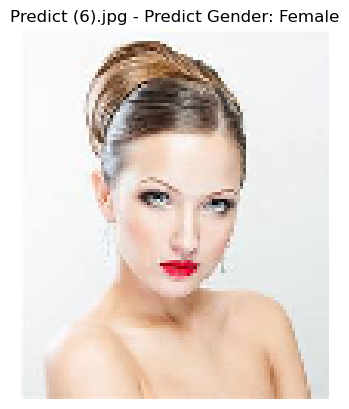

1/1 [==============================] - 0s 12ms/step


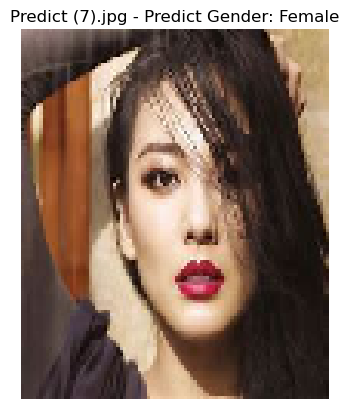

1/1 [==============================] - 0s 10ms/step


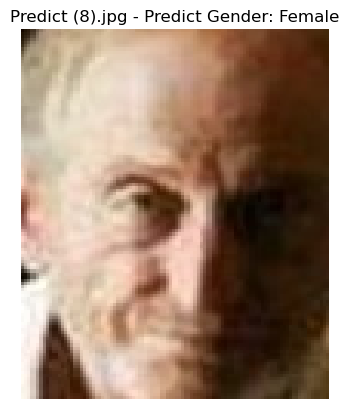

1/1 [==============================] - 0s 11ms/step


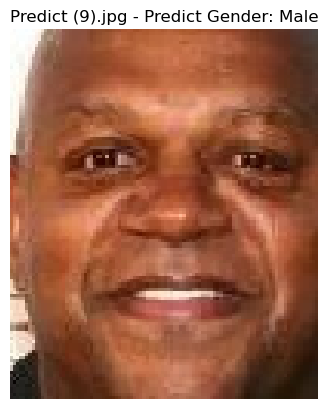

In [29]:
model = load_model(model_path2, custom_objects={'custom_categorical_crossentropy': custom_categorical_crossentropy, 'custom_accuracy': custom_accuracy})
folder_path = 'Image_Datasets/images to predict'  

for img_file in os.listdir(folder_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=(120, 100))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  
        img_array /= 255.0  

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        prediction_text = "Female" if predicted_class[0] == 0 else "Male"

        plt.imshow(img)
        plt.title(f"{img_file} - Predict Gender: {prediction_text}")
        plt.axis('off')  
        plt.show()

    Compare model evaluation using in-build loss and accuracy

In [16]:
def plot_training_history_2(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))


    plt.figure(figsize=(12, 12))

    # Accuracy
    plt.subplot(3, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(3, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

        Training model 1 using in-build loss and accuracy

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_1_in_build = Franklin_ensemble_model_1((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_1_in_build.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy']
)
Franklin_ensemble_model_1_in_build.summary()
print(Franklin_ensemble_model_1_in_build.optimizer) 
print(Franklin_ensemble_model_1_in_build.loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
history1_2 = Franklin_ensemble_model_1_in_build.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])

Epoch 1/50
126/126 [==============================] - 15s 102ms/step - loss: 1.1436 - accuracy: 0.5320 - val_loss: 0.8697 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 12s 98ms/step - loss: 0.5682 - accuracy: 0.7672 - val_loss: 1.2671 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 13s 99ms/step - loss: 0.4208 - accuracy: 0.8181 - val_loss: 1.7726 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 13s 100ms/step - loss: 0.3709 - accuracy: 0.8431 - val_loss: 0.7196 - val_accuracy: 0.5305 - lr: 0.0010
Epoch 5/50
126/126 [==============================] - 13s 100ms/step - loss: 0.3523 - accuracy: 0.8544 - val_loss: 0.3392 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 6/50
126/126 [==============================] - 13s 100ms/step - loss: 0.3171 - accuracy: 0.8703 - val_loss: 0.2774 - val_accuracy: 0.8911 - lr: 0.0010
Epoch 7/50
126/126 [==============================] - 

In [19]:
model_path1_2 = 'modelsave/Franklin_ensemble_model_1_in_build.h5'
Franklin_ensemble_model_1_in_build.save(model_path1_2)

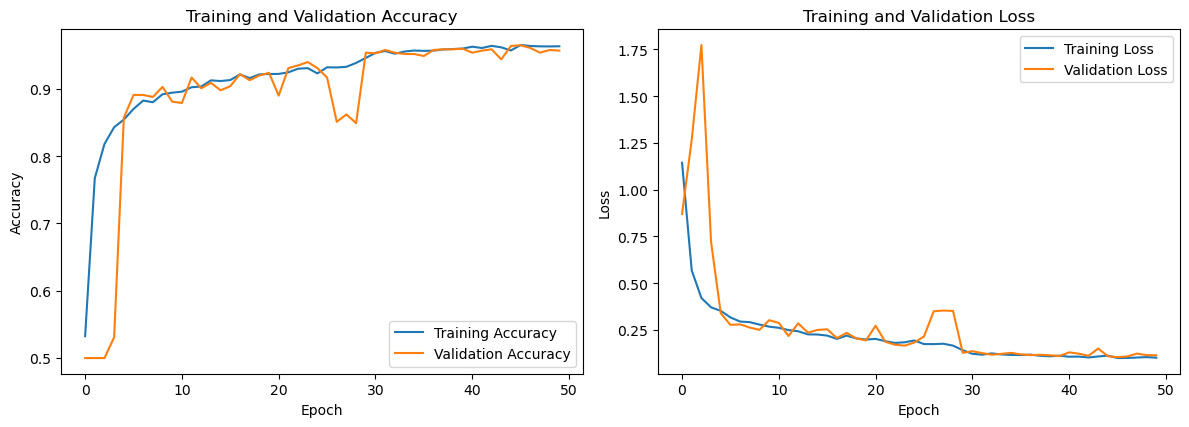

7/7 [==============================] - 0s 26ms/step - loss: 0.1033 - accuracy: 0.9598
Loss: 0.10327800363302231
Accuracy: 0.9598214030265808


In [20]:
plot_training_history_2(history1_2)
evaluation_result = Franklin_ensemble_model_1_in_build.evaluate(test_generator, steps=7)
print(f"Loss: {evaluation_result[0]}")
print(f"Accuracy: {evaluation_result[1]}")

        Training model 2 using in-build loss and accuracy

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_2_in_build = Franklin_ensemble_model_2((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_2_in_build.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy']
)
Franklin_ensemble_model_2_in_build.summary()
print(Franklin_ensemble_model_2_in_build.optimizer) 
print(Franklin_ensemble_model_2_in_build.loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
history2_2 = Franklin_ensemble_model_2_in_build.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])

Epoch 1/50
126/126 [==============================] - 14s 101ms/step - loss: 0.9133 - accuracy: 0.5830 - val_loss: 1.7444 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 12s 99ms/step - loss: 0.6536 - accuracy: 0.7145 - val_loss: 1.6523 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 13s 99ms/step - loss: 0.4982 - accuracy: 0.7939 - val_loss: 1.7221 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 13s 100ms/step - loss: 0.4149 - accuracy: 0.8281 - val_loss: 0.7651 - val_accuracy: 0.5554 - lr: 0.0010
Epoch 5/50
126/126 [==============================] - 13s 99ms/step - loss: 0.3667 - accuracy: 0.8527 - val_loss: 0.7419 - val_accuracy: 0.7073 - lr: 0.0010
Epoch 6/50
126/126 [==============================] - 13s 99ms/step - loss: 0.3592 - accuracy: 0.8549 - val_loss: 0.5206 - val_accuracy: 0.7652 - lr: 0.0010
Epoch 7/50
126/126 [==============================] - 13

In [19]:
model_path2_2 = 'modelsave/Franklin_ensemble_model_2_in_build.h5'
Franklin_ensemble_model_2_in_build.save(model_path2_2)

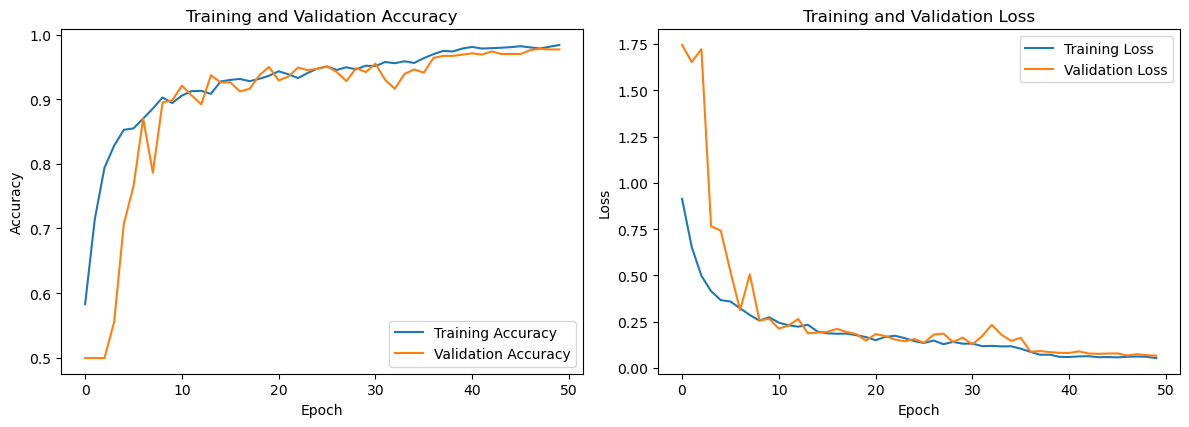

7/7 [==============================] - 0s 26ms/step - loss: 0.0554 - accuracy: 0.9844
Loss: 0.055412232875823975
Accuracy: 0.984375


In [20]:

plot_training_history_2(history2_2)
evaluation_result = Franklin_ensemble_model_2_in_build.evaluate(test_generator, steps=7)
print(f"Loss: {evaluation_result[0]}")
print(f"Accuracy: {evaluation_result[1]}")

    Compare model with not using attention mechanism

        Model 1 not using attention

In [17]:
def Franklin_ensemble_model_1_no_attention(input_shape, num_classes, l2_rate):
    inputs = layers.Input(shape=input_shape)

    x = depthwise_separable_resnet_block(inputs, filters=64)
    x = depthwise_separable_resnet_block(x, filters=32)

    x = layers.Conv2D(32, (5, 5), strides=2, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    x = inception_with_SE_block(x, 32, l2_rate)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x) 
      
    x = inception_with_SE_block(x, 32, l2_rate) 
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    combined_model_with_attention = models.Model(inputs=inputs, outputs=outputs)
    return combined_model_with_attention

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_1_no_attention = Franklin_ensemble_model_1_no_attention((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_1_no_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy']
)
Franklin_ensemble_model_1_no_attention.summary()
print(Franklin_ensemble_model_1_no_attention.optimizer) 
print(Franklin_ensemble_model_1_no_attention.loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [19]:
history1_3 = Franklin_ensemble_model_1_no_attention.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])

Epoch 1/50
126/126 [==============================] - 14s 101ms/step - loss: 1.1970 - accuracy: 0.5950 - val_loss: 0.9289 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 13s 99ms/step - loss: 0.7055 - accuracy: 0.6964 - val_loss: 0.7805 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 12s 98ms/step - loss: 0.5373 - accuracy: 0.7725 - val_loss: 0.7782 - val_accuracy: 0.5085 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 13s 99ms/step - loss: 0.4315 - accuracy: 0.8358 - val_loss: 0.6179 - val_accuracy: 0.6503 - lr: 0.0010
Epoch 5/50
126/126 [==============================] - 13s 99ms/step - loss: 0.3742 - accuracy: 0.8620 - val_loss: 0.4221 - val_accuracy: 0.8272 - lr: 0.0010
Epoch 6/50
126/126 [==============================] - 13s 100ms/step - loss: 0.3338 - accuracy: 0.8768 - val_loss: 1.0514 - val_accuracy: 0.5674 - lr: 0.0010
Epoch 7/50
126/126 [==============================] - 13

In [20]:
model_path1_3 = 'modelsave/Franklin_ensemble_model_1_no_attention.h5'
Franklin_ensemble_model_1_no_attention.save(model_path1_3)

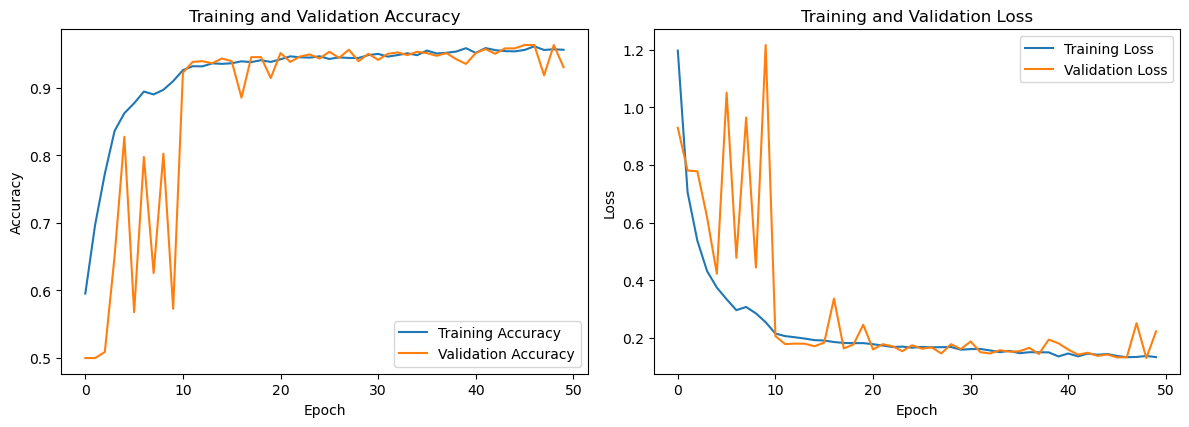

7/7 [==============================] - 0s 28ms/step - loss: 0.2310 - accuracy: 0.9196
Loss: 0.23097001016139984
Accuracy: 0.9196428656578064


In [21]:
plot_training_history_2(history1_3)
evaluation_result = Franklin_ensemble_model_1_no_attention.evaluate(test_generator, steps=7)
print(f"Loss: {evaluation_result[0]}")
print(f"Accuracy: {evaluation_result[1]}")

        Model 2 not using attention

In [18]:
def Franklin_ensemble_model_2_no_attention(input_shape, num_classes, l2_rate):
    inputs = layers.Input(shape=input_shape)

    x = resnet_block(inputs, filters=64)
    x = resnet_block(x, filters=64)

    x = layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_model(x, 32, l2_rate)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_model(x, 32, l2_rate)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    combined_model_with_attention = models.Model(inputs=inputs, outputs=outputs)
    return combined_model_with_attention

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_2_no_attention = Franklin_ensemble_model_2_no_attention((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_2_no_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy']
)
Franklin_ensemble_model_2_no_attention.summary()
print(Franklin_ensemble_model_2_no_attention.optimizer) 
print(Franklin_ensemble_model_2_no_attention.loss)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [20]:
history2_3 = Franklin_ensemble_model_2_no_attention.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])

Epoch 1/50
126/126 [==============================] - 14s 100ms/step - loss: 1.0549 - accuracy: 0.5771 - val_loss: 0.9987 - val_accuracy: 0.5015 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 13s 99ms/step - loss: 0.8818 - accuracy: 0.6279 - val_loss: 1.0481 - val_accuracy: 0.5025 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 13s 101ms/step - loss: 0.7809 - accuracy: 0.6912 - val_loss: 1.7131 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 13s 100ms/step - loss: 0.5941 - accuracy: 0.8059 - val_loss: 1.3345 - val_accuracy: 0.5095 - lr: 0.0010
Epoch 5/50
126/126 [==============================] - 13s 101ms/step - loss: 0.4913 - accuracy: 0.8511 - val_loss: 1.1659 - val_accuracy: 0.5375 - lr: 0.0010
Epoch 6/50
126/126 [==============================] - 13s 101ms/step - loss: 0.4515 - accuracy: 0.8624 - val_loss: 0.5336 - val_accuracy: 0.7922 - lr: 0.0010
Epoch 7/50
126/126 [==============================] -

In [21]:
model_path2_3 = 'modelsave/Franklin_ensemble_model_2_no_attention.h5'
Franklin_ensemble_model_2_no_attention.save(model_path2_3)

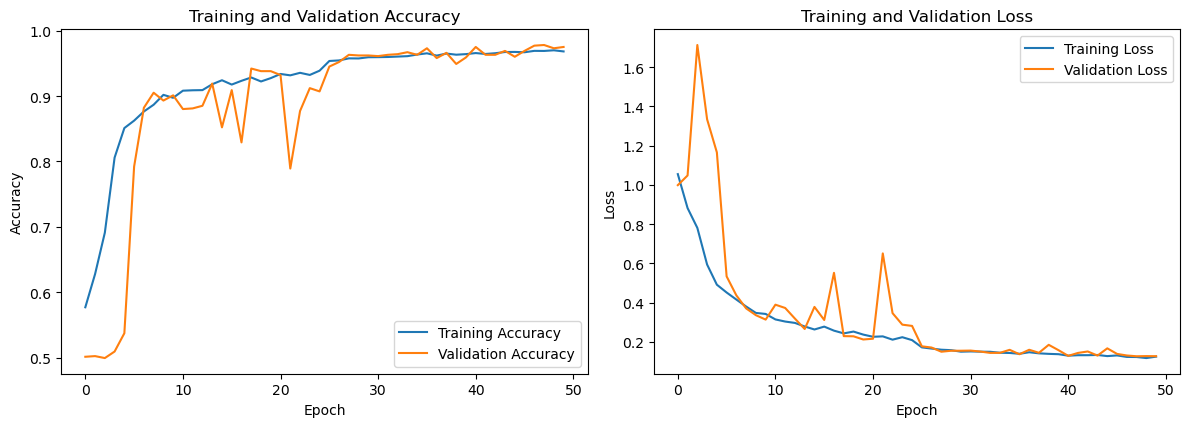

7/7 [==============================] - 0s 28ms/step - loss: 0.2168 - accuracy: 0.9688
Loss: 0.2167762964963913
Accuracy: 0.96875


In [22]:
plot_training_history_2(history2_3)
evaluation_result = Franklin_ensemble_model_2_no_attention.evaluate(test_generator, steps=7)
print(f"Loss: {evaluation_result[0]}")
print(f"Accuracy: {evaluation_result[1]}")

    Hyparameter TEST (file name: compare_model_with_pre_train_model)

    Compare model_1 and model_2 with Pre-train models (ResNet101, InceptionV3, and MobileNetV2)
    (file name: hyperparameter_tuning_test)

# **Bonus Point**

In [16]:
def weighted_cumulative_crossentropy(y_true, y_pred, weight_factor=0.5):
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

    basic_crossentropy = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)

    cumulative_y_pred = tf.cumsum(y_pred, axis=-1)
    cumulative_y_true = tf.cumsum(y_true, axis=-1)
    cumulative_loss = tf.reduce_sum(tf.abs(cumulative_y_pred - cumulative_y_true), axis=-1)

    combined_loss = (1 - weight_factor) * basic_crossentropy + weight_factor * cumulative_loss
    return combined_loss

    Training model using custom weighted_cumulative_crossentropy loss function.

        Model 1 using using custom weighted_cumulative_crossentropy loss function.

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_1_using_new_loss = Franklin_ensemble_model_1((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_1_using_new_loss.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss=weighted_cumulative_crossentropy,
                       metrics=[custom_accuracy, Precision(name='precision'), Recall(name='recall')]
)
Franklin_ensemble_model_1_using_new_loss.summary()
print(Franklin_ensemble_model_1_using_new_loss.optimizer) 
print(Franklin_ensemble_model_1_using_new_loss.loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [20]:
history1_4 = Franklin_ensemble_model_1_using_new_loss.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])


Epoch 1/50
126/126 [==============================] - 15s 102ms/step - loss: 0.9427 - custom_accuracy: 0.6855 - precision: 0.6868 - recall: 0.6868 - val_loss: 0.7319 - val_custom_accuracy: 0.5888 - val_precision: 0.5894 - val_recall: 0.5894 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 12s 98ms/step - loss: 0.4253 - custom_accuracy: 0.8163 - precision: 0.8163 - recall: 0.8163 - val_loss: 0.8071 - val_custom_accuracy: 0.5008 - val_precision: 0.5005 - val_recall: 0.5005 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 12s 98ms/step - loss: 0.3358 - custom_accuracy: 0.8368 - precision: 0.8368 - recall: 0.8368 - val_loss: 0.6211 - val_custom_accuracy: 0.5195 - val_precision: 0.5225 - val_recall: 0.5225 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 13s 99ms/step - loss: 0.2943 - custom_accuracy: 0.8540 - precision: 0.8542 - recall: 0.8542 - val_loss: 0.3693 - val_custom_accuracy: 0.8451 - val_precision: 0.8472 - val_recall: 0.8472 

In [21]:
model_path1_4 = 'modelsave/Franklin_ensemble_model_1_using_new_loss.h5'
Franklin_ensemble_model_1_using_new_loss.save(model_path1_4)

30/30 [==============================] - 0s 9ms/step


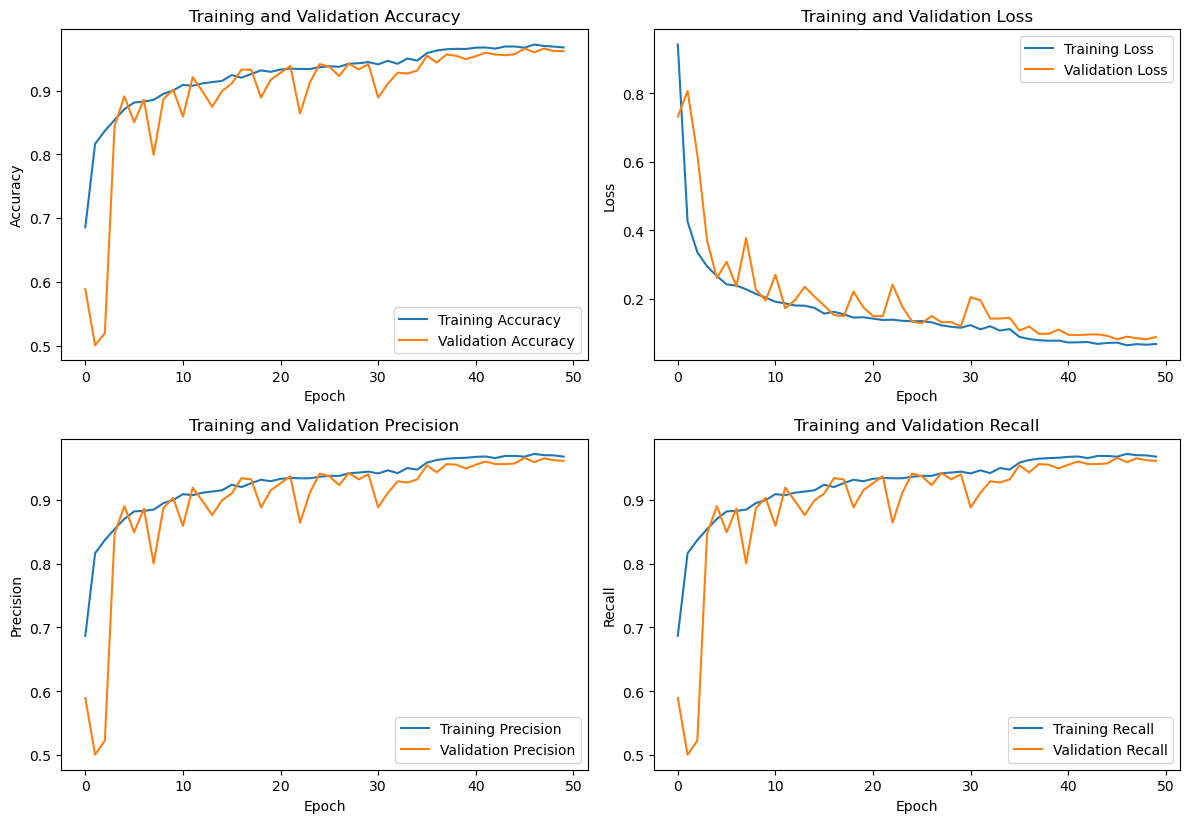

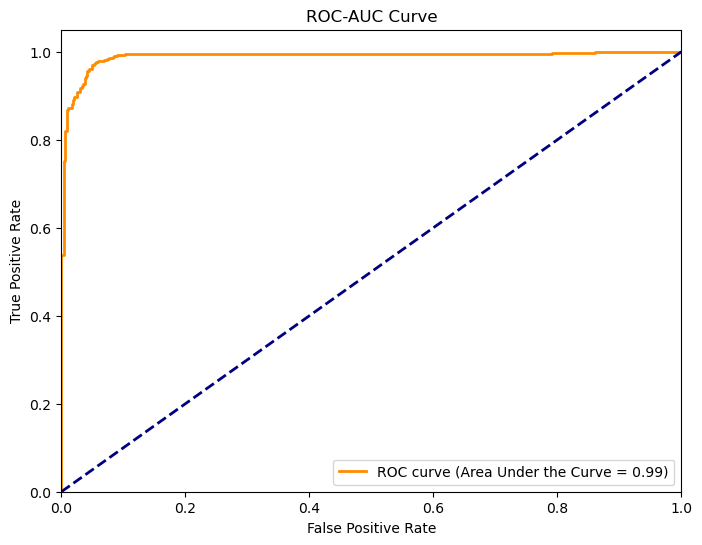

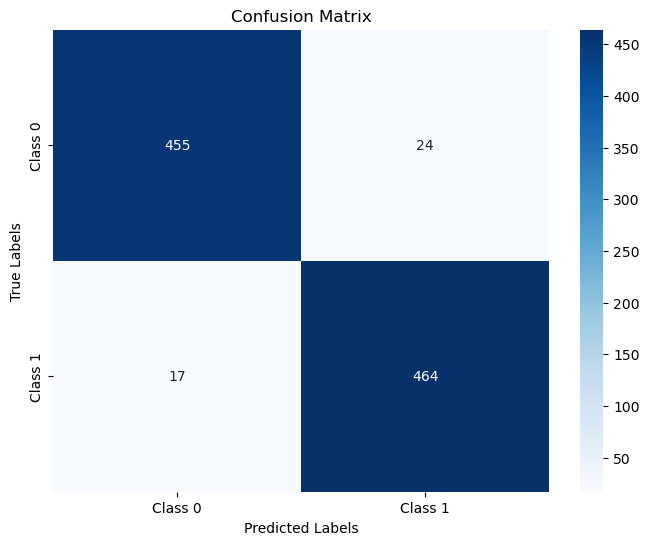

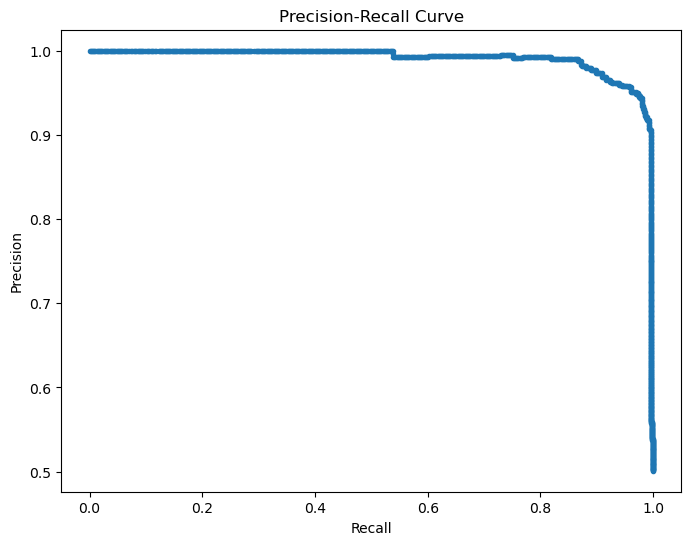

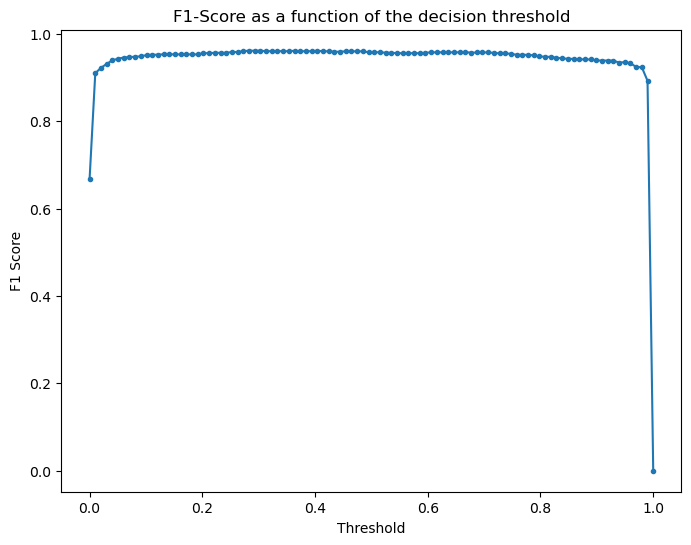

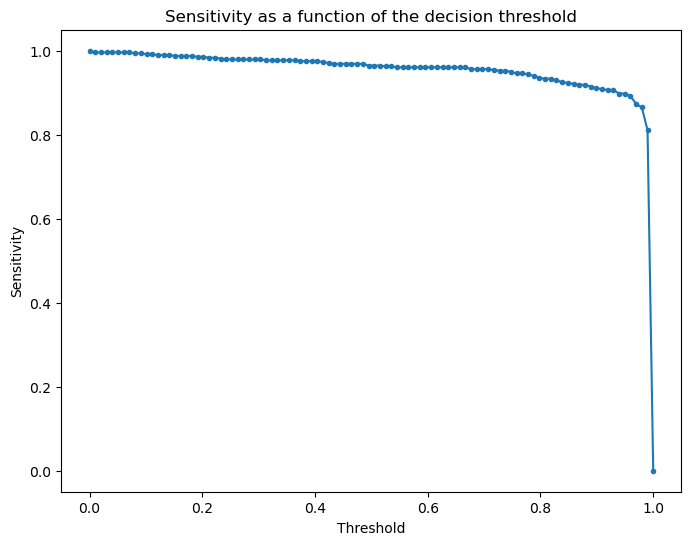

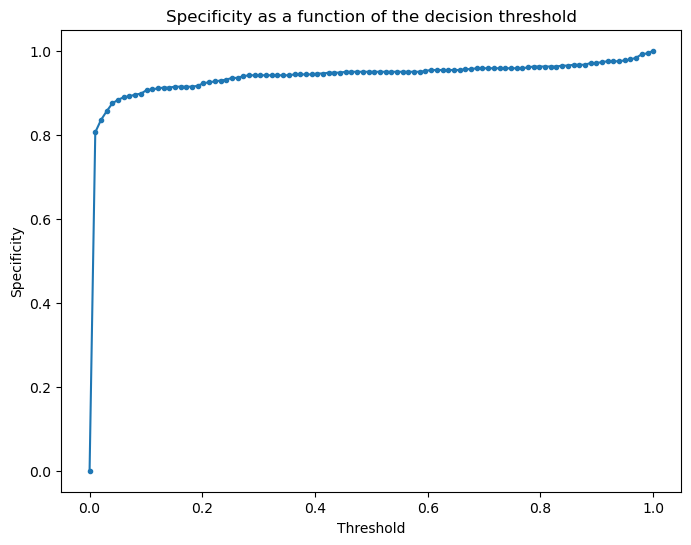

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       479
           1       0.95      0.96      0.96       481

    accuracy                           0.96       960
   macro avg       0.96      0.96      0.96       960
weighted avg       0.96      0.96      0.96       960

Sensitivity: 0.96
Specificity: 0.95
Precision: 0.95
Recall: 0.96
F1 Score: 0.96
AUC: 0.9897048164271548
Confusion Matrix:
[[455  24]
 [ 17 464]]
7/7 [==============================] - 0s 27ms/step - loss: 0.1062 - custom_accuracy: 0.9554 - precision: 0.9554 - recall: 0.9554


In [22]:
model_path = model_path1_4
custom_objects={'weighted_cumulative_crossentropy': weighted_cumulative_crossentropy,'custom_accuracy': custom_accuracy}
true_labels, predicted_labels, predicted_probabilities = load_and_predict_model(model_path, test_generator, custom_objects)


plot_training_history(history1_4)

plot_roc_auc_curve(true_labels, predicted_probabilities)
plot_confusion_matrix(true_labels, predicted_labels)
plot_precision_recall_curve(true_labels, predicted_probabilities)

thresholds, f1_scores = calculate_f1_scores(true_labels, predicted_probabilities)
plot_f1_scores(thresholds, f1_scores)

thresholds, sensitivity_scores, specificity_scores = calculate_sensitivity_specificity(true_labels, predicted_probabilities)
plot_sensitivity(thresholds, sensitivity_scores)
plot_specificity(thresholds, specificity_scores)

print_classification_metrics(true_labels, predicted_labels, predicted_probabilities)


evaluation_result = Franklin_ensemble_model_1_using_new_loss.evaluate(test_generator, steps=7)

        Model 2 using using custom weighted_cumulative_crossentropy loss function.

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min')

Franklin_ensemble_model_2_using_new_loss = Franklin_ensemble_model_2((120, 100, 3), num_classes=2, l2_rate=0.001)
Franklin_ensemble_model_2_using_new_loss.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss=weighted_cumulative_crossentropy,
                       metrics=[custom_accuracy, Precision(name='precision'), Recall(name='recall')]
)
Franklin_ensemble_model_2_using_new_loss.summary()
print(Franklin_ensemble_model_2_using_new_loss.optimizer) 
print(Franklin_ensemble_model_2_using_new_loss.loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 100, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 120, 100, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
history2_4 = Franklin_ensemble_model_2_using_new_loss.fit(train_generator, epochs=50, validation_data=validation_generator,callbacks=[early_stopping, lr_reduction])


Epoch 1/50
126/126 [==============================] - 14s 101ms/step - loss: 0.8024 - custom_accuracy: 0.5791 - precision: 0.5776 - recall: 0.5776 - val_loss: 1.0234 - val_custom_accuracy: 0.5020 - val_precision: 0.4995 - val_recall: 0.4995 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - 13s 100ms/step - loss: 0.4982 - custom_accuracy: 0.7517 - precision: 0.7517 - recall: 0.7517 - val_loss: 0.8243 - val_custom_accuracy: 0.5052 - val_precision: 0.5045 - val_recall: 0.5045 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - 13s 100ms/step - loss: 0.3667 - custom_accuracy: 0.8229 - precision: 0.8233 - recall: 0.8233 - val_loss: 0.4311 - val_custom_accuracy: 0.7869 - val_precision: 0.7842 - val_recall: 0.7842 - lr: 0.0010
Epoch 4/50
126/126 [==============================] - 13s 100ms/step - loss: 0.3080 - custom_accuracy: 0.8483 - precision: 0.8481 - recall: 0.8481 - val_loss: 0.3707 - val_custom_accuracy: 0.7927 - val_precision: 0.7952 - val_recall: 0.79

In [19]:
model_path2_4 = 'modelsave/Franklin_ensemble_model_2_using_new_loss.h5'
Franklin_ensemble_model_2_using_new_loss.save(model_path2_4)

30/30 [==============================] - 1s 12ms/step


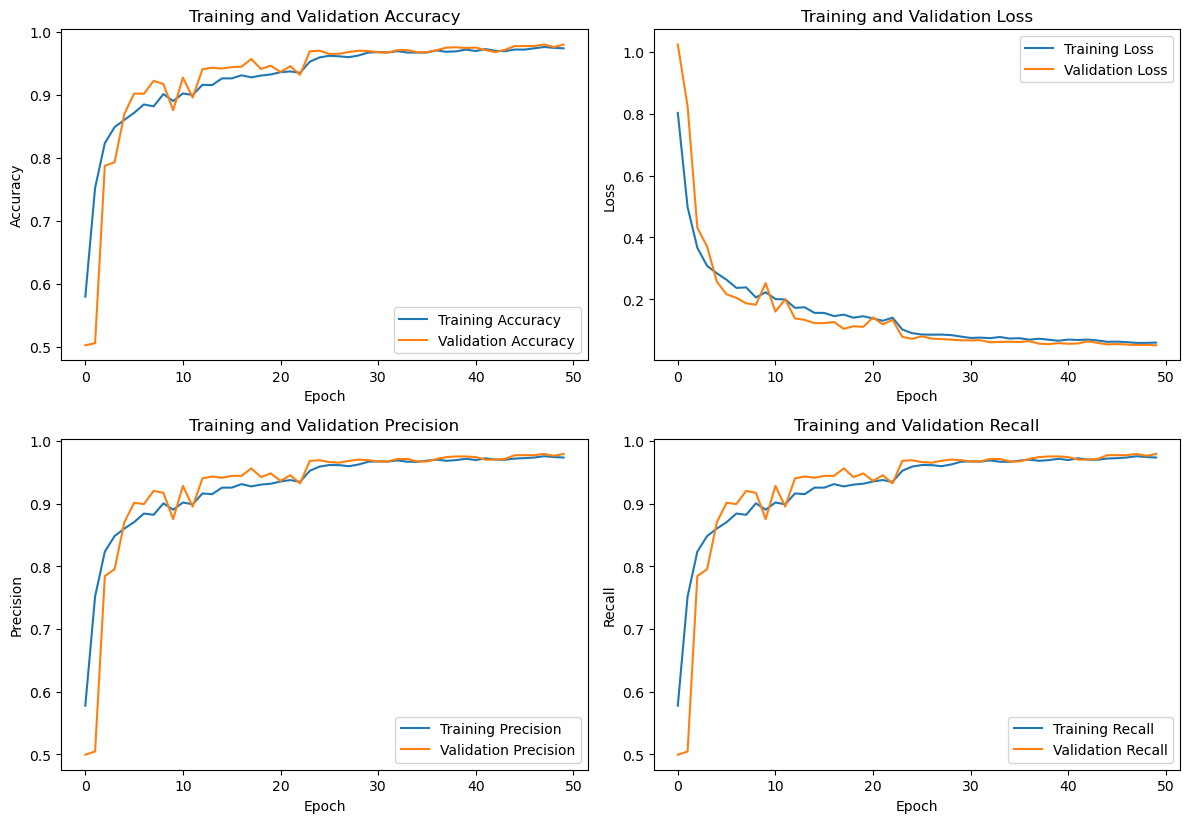

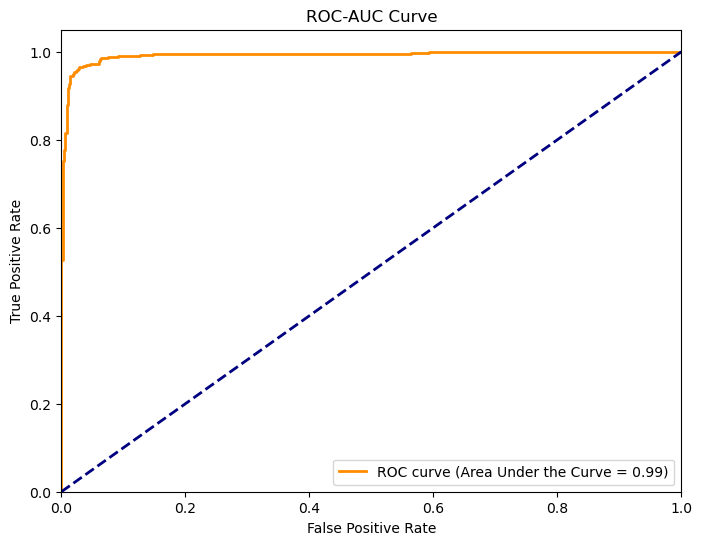

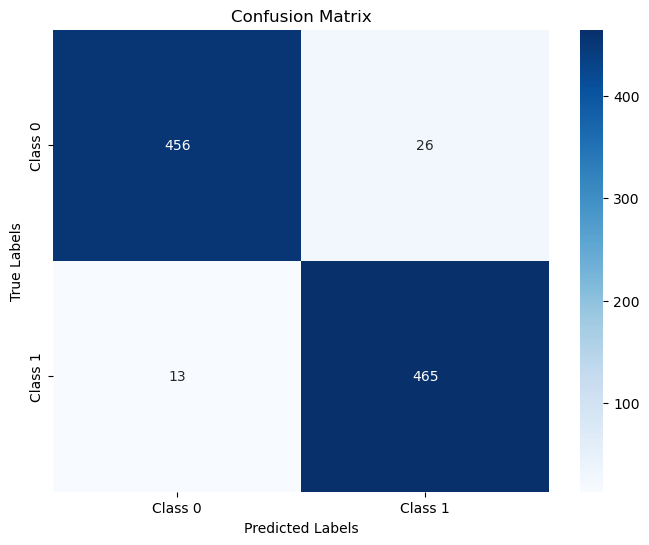

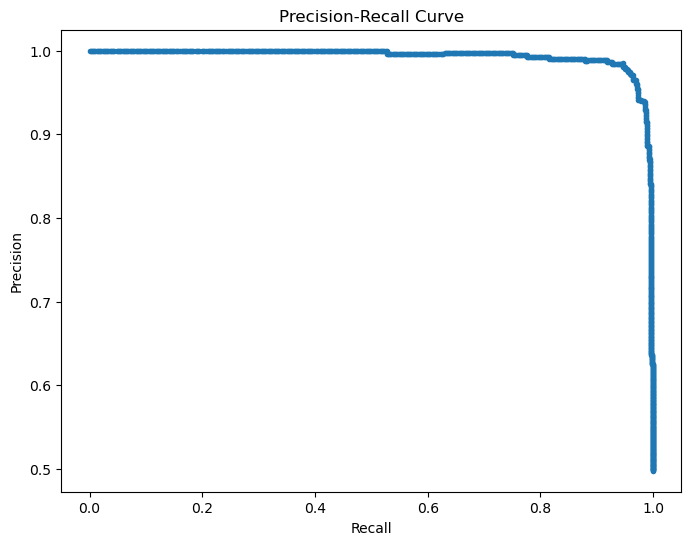

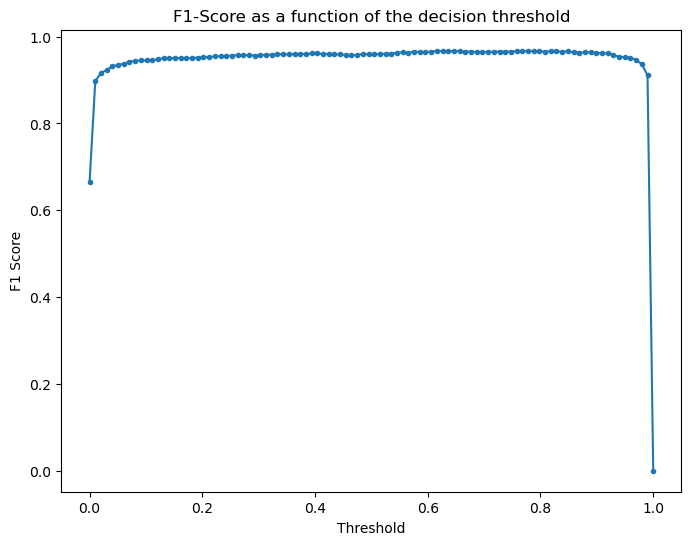

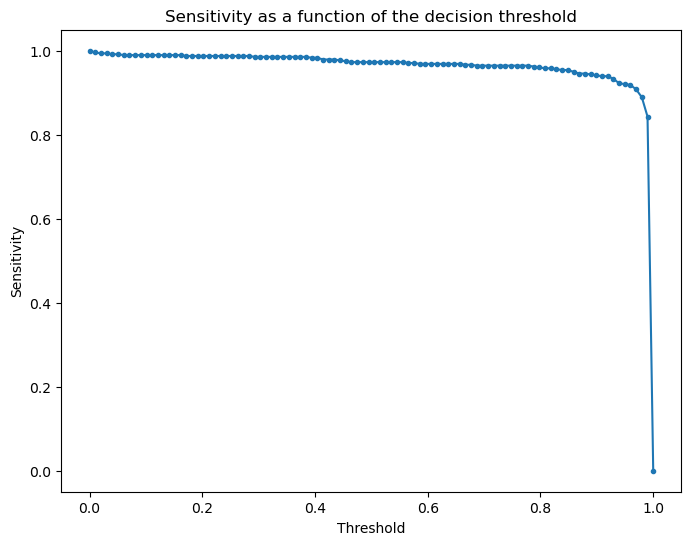

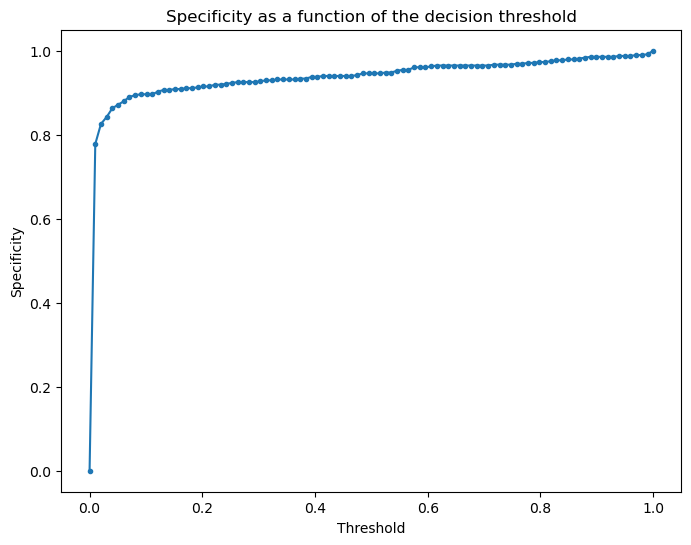

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       482
           1       0.95      0.97      0.96       478

    accuracy                           0.96       960
   macro avg       0.96      0.96      0.96       960
weighted avg       0.96      0.96      0.96       960

Sensitivity: 0.97
Specificity: 0.95
Precision: 0.95
Recall: 0.97
F1 Score: 0.96
AUC: 0.9925996979114221
Confusion Matrix:
[[456  26]
 [ 13 465]]
7/7 [==============================] - 0s 26ms/step - loss: 0.1225 - custom_accuracy: 0.9442 - precision: 0.9442 - recall: 0.9442


In [20]:
model_path = model_path2_4
custom_objects={'weighted_cumulative_crossentropy': weighted_cumulative_crossentropy,'custom_accuracy': custom_accuracy}
true_labels, predicted_labels, predicted_probabilities = load_and_predict_model(model_path, test_generator, custom_objects)


plot_training_history(history2_4)

plot_roc_auc_curve(true_labels, predicted_probabilities)
plot_confusion_matrix(true_labels, predicted_labels)
plot_precision_recall_curve(true_labels, predicted_probabilities)

thresholds, f1_scores = calculate_f1_scores(true_labels, predicted_probabilities)
plot_f1_scores(thresholds, f1_scores)

thresholds, sensitivity_scores, specificity_scores = calculate_sensitivity_specificity(true_labels, predicted_probabilities)
plot_sensitivity(thresholds, sensitivity_scores)
plot_specificity(thresholds, specificity_scores)

print_classification_metrics(true_labels, predicted_labels, predicted_probabilities)


evaluation_result = Franklin_ensemble_model_2_using_new_loss.evaluate(test_generator, steps=7)